In [136]:
import os
import json
import base64
import numpy as np
import pandas as pd
import geopandas as gpd
from typing import Optional
from pyiceberg.expressions import And, GreaterThanOrEqual, LessThanOrEqual
from pyiceberg.catalog import load_catalog

# Input Geodataframe

## Overture Maps with Google Maps

In [137]:
ny_gplc_ove = gpd.read_file('/Users/houpuli/Redlining Lab Dropbox/HOUPU LI/POI research/ny_gplc_ove.geojson')
ny_gplc_ove

,circle_id,id,name,address,primary_type,lat,lon,primary_cat,addr_simple,matched_id,name_score,location_distance,matched_name,address_score,matched_address,is_true_match,true_match_prob,geometry
0,0,ChIJz2WoQWPkwIkRBJ3miPA5ahs,Spirit,"14 S New York Rd, Absecon, NJ 08205, USA",gas_station,39.491219,-74.457829,automotive,14 S New York Rd,632360ec-195b-4917-b0c8-66d5e2bf69c2,100.000000,17.92975373259014,Spirit,100,14 S New York Rd,1,0.998243,POINT (-74.45783 39.49122)
1,0,ChIJg_UjgFDkwIkR89co4QCy4fM,Integrity Auto Works,"167 S New York Rd, Absecon, NJ 08205, USA",car_repair,39.472252,-74.460912,automotive,167 S New York Rd,NaN,41.707317,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.46091 39.47225)
2,0,ChIJybcilkTkwIkREudTyhAsa5Q,Frank Dean Automotive,"145 Old Port Republic Rd, Galloway, NJ 08205, USA",car_repair,39.476918,-74.465489,automotive,145 Old Port Republic Rd,e1386ee1-ce61-4cc0-a84a-8378acf213e5,100.000000,2.753238309807567,Frank Dean Automotive,100,145 Old Port Republic Rd,1,0.998220,POINT (-74.46549 39.47692)
3,2,ChIJh6zQjLT_wIkR1SNfEP5Vl2I,Beach Parking @ Wooden Jetty,"5500-5598 S Long Beach Blvd, Long Beach, NJ 08...",parking,39.532222,-74.262475,automotive,5500-5598 S Long Beach Blvd,caa0127b-cc11-4b31-b33a-abcbee874386,90.000000,122.9870780757078,Wooden Jetty,NaN,NaN,0,0.175447,POINT (-74.26248 39.53222)
4,2,ChIJzWJQYr7_wIkRYh_qE1cRWkc,Wildlife Parking,"6805 S Long Beach Blvd, Long Beach, NJ 08008, USA",parking,39.531471,-74.262935,automotive,6805 S Long Beach Blvd,81a5f23e-3622-4fa6-9a57-ec6477b7796f,85.500000,312.7053587814158,Edwin B. Forsythe National Wildlife Refuge,39,11 Lincoln Ave,0,0.018811,POINT (-74.26293 39.53147)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65739,452,ChIJexEE0P823YkR-27f_ozfLw0,Route 9 N & Schuyler Blvd Hotels,"Fishkill, NY 12524, USA",bus_stop,41.526371,-73.891182,transportation,Fishkill,b2bd0d7c-ad90-409a-90f4-e5309d118f60,85.500000,383.6052347413348,Swim & Play Fishkill,0,544 Route 9,0,0.025666,POINT (-73.89118 41.52637)
65740,454,ChIJ19w-rEtP3YkRd0-FEgSUVJs,Kent Park and Ride - Exit 58,"Unnamed Road, Holmes, NY 12531, USA",park_and_ride,41.507060,-73.679592,transportation,Unnamed Road,281a3c55-9da3-4976-ab7e-55a4eaeb3c29,85.500000,205.4707837016296,Pine Bush Equipment Co Inc. and PBE NAPA Auto ...,8,24 Sybil Ct,0,0.025666,POINT (-73.67959 41.50706)
65741,455,ChIJl78fsYlQ3YkR8wTU3Z87mE8,Patterson,"Patterson, NY 12563, USA",train_station,41.511741,-73.604266,transportation,Patterson,5c95b5fa-59a3-455b-bce9-a3fef615fb87,90.000000,39.29237323263206,MTA Metro-North Railroad-Patterson,30,25 Front St,0,0.430700,POINT (-73.60427 41.51174)
65742,455,ChIJP6Yh70tQ3YkROQ_4xOEmIRY,Park & Ride,"NY-311, Patterson, NY 12563, USA",park_and_ride,41.474254,-73.643322,transportation,NY-311,a5ec3fa6-c83a-4438-8a01-70535db9df53,85.500000,1034.280831383071,Kent Countryside Nursery & Landscaping,22,61 Ludington Ct,0,0.036458,POINT (-73.64332 41.47425)


## Overture Maps resturant with Department of Health and Mental Hygiene(DOHMH)

In [138]:
nyc_c_ove = gpd.read_file('/Users/houpuli/Redlining Lab Dropbox/HOUPU LI/POI research/ny_c_ove_restaurant.geojson')
nyc_c_ove

,id,version,name,address,updated_year,category,matched_id,name_score,location_distance,matched_name,address_score,matched_address,is_true_match,true_match_prob,geometry
0,row-3rda.zmw6_xp4m,rv-pdr7_f9vf.8tba,KETEA,36-12 MAIN STREET,2025,Restaurant,NaN,64.125000,NaN,NaN,0.0,NaN,NaN,NaN,POINT (-73.83171 40.76252)
1,row-ytqa~g2vr.6a5z,rv-59qb.f9a2_ueuj,APPLE BLOSSOM,40-05 SKILLMAN AVENUE,2025,Restaurant,NaN,45.862069,NaN,NaN,0.0,NaN,NaN,NaN,POINT (-73.92342 40.74720)
2,row-rx7s_2p9t-iqp4,rv-tek2-4v6w_zjc6,THE BLUE BLOSSOM,135 NORTH 5 STREET,2025,Restaurant,9637767a-702a-4144-9c45-2b9d3727a96a,85.500000,31.817652,THE LITTLE BROOKLYN MARKET,33.0,218 BEDFORD AVE,0,0.006502,POINT (-73.95925 40.71694)
3,row-bjv9.8q5f~gtur,rv-naqd~wgdf.tvjs,GREENLAND DELI PLUS CORP,4311 KATONAH AVENUE,2025,Restaurant,NaN,46.153846,NaN,NaN,0.0,NaN,NaN,NaN,POINT (-73.86747 40.89905)
4,row-fn6x.ecsd-rr8d,rv-r2u5-2k5n.i3cs,FERMENTO,226 VARICK STREET,2025,Restaurant,NaN,67.500000,NaN,NaN,0.0,NaN,NaN,NaN,POINT (-74.00523 40.72913)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29762,row-ym4t.mqkm.3x6i,rv-zbkb_xwgn-qq6y,ARTHOUSE,2717 AVENUE U,2025,Restaurant,NaN,61.071429,NaN,NaN,0.0,NaN,NaN,NaN,POINT (-73.94450 40.60014)
29763,row-aqni_a5n2.jh4z,rv-qhys.eupn-mnyz,RAMEN BY RA,70 EAST 1 STREET,2025,Restaurant,NaN,64.125000,NaN,NaN,0.0,NaN,NaN,NaN,POINT (-73.98877 40.72341)
29764,row-4tez.e9t5~h2pz,rv-ntr4-wi27_6rec,EARTHBAR,69 PRINCE STREET,2025,Restaurant,NaN,70.588235,NaN,NaN,0.0,NaN,NaN,NaN,POINT (-73.99707 40.72393)
29765,row-n9j7-7v3f~i36m,rv-hd2r.v9w7~64zn,ERNST & YOUNG - 8TH FLOOR,1 MANHATTAN WEST,2025,Restaurant,776abd49-5d57-4e00-963a-05bbb4f765e2,85.500000,23.881369,"SKADDEN, ARPS, SLATE, MEAGHER & FLOM LLP AND A...",85.0,"ONE MANHATTAN WEST, 395 9TH AVE",0,0.198643,POINT (-73.99713 40.75226)


## Google Maps food with DOHMH

In [139]:
ny_gplc_c = gpd.read_file('/Users/houpuli/Redlining Lab Dropbox/HOUPU LI/POI research/ny_golc_c.geojson')

In [140]:
ny_gplc_c

,id,name,address,primary_cat,addr_simple,matched_id,name_score,location_distance,address_score,matched_name,matched_address,is_true_match,geometry
0,ChIJKa9zTFtKwokRU2HJ12JnXBs,BELLI BACI BAKERY.,"7358 Amboy Rd, Staten Island, NY 10307, USA",food,7358 AMBOY RD,NaN,NaN,NaN,NaN,NaN,NaN,0.0,POINT (-74.24227 40.51053)
1,ChIJl8GODJzKw4kRIa6MfpzFw8A,CRACKER BARREL DELI,"180 Main St, Staten Island, NY 10307, USA",food,180 MAIN ST,NaN,NaN,NaN,NaN,NaN,NaN,0.0,POINT (-74.24854 40.51057)
2,ChIJOyOxW1m1w4kRX135VQ1AeMQ,MCDONALD'S,"260 Page Ave, Staten Island, NY 10307, USA",food,260 PAGE AVE,row-g7qu.29r7-s3dn,100.000000,45.785828,88.0,MCDONALD'S,260 PAGE AVENUE,1.0,POINT (-74.23475 40.51774)
3,ChIJM5bI6WhJwokRj9GNkxvXnYs,PARIS BAGUETTE,"2742 Hylan Blvd, Staten Island, NY 10306, USA",food,2742 HYLAN BLVD,row-7aa5.32jr.sv35,100.000000,183.097108,85.0,PARIS BAGUETTE,2742 HYLAN BOULEVARD,1.0,POINT (-74.11391 40.56458)
4,ChIJAU-quKBLwokRkSe_AEI9SV8,MCDONALD'S,"3267 Richmond Ave, Staten Island, NY 10312, USA",food,3267 RICHMOND AVE,row-2qwx~v6vg-mize,100.000000,152.625671,91.0,MCDONALD'S,3267 RICHMOND AVENUE,1.0,POINT (-74.16819 40.55965)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,ChIJ1RfMugf0wokR9plYzcTb04Y,REPUBLICA RESTAURANT ROOFTOP & LOUNGE,"160 Dyckman St, New York, NY 10040, USA",food,160 DYCKMAN ST,row-puyc.tk4f-mshz,90.000000,27.595921,87.0,REPUBLICA,160 DYCKMAN STREET,1.0,POINT (-73.92634 40.86363)
581,ChIJAQAQfEnzwokR5cXlw6wWYxU,CODE RED RESTAURANT & LOUNGE,"1320 E Gun Hill Rd, Bronx, NY 10469, USA",food,1320 E GUN HILL RD,row-rq98.fpcu-ewfy,90.000000,28.596869,87.0,CODE RED,1320 EAST GUN HILL ROAD,1.0,POINT (-73.84811 40.87119)
582,ChIJ4bqLakONwokRgverxD9jjE8,KPOT KOREAN BBQ & HOT POT,"200 Baychester Ave 207A (2nd Floor, Bronx, NY ...",food,200 BAYCHESTER AVE 207A (2ND FLOOR,row-u58x-87bq.2ufi,98.039216,352.142886,85.0,K POT KOREAN BBQ & HOT POT,200 BAYCHESTER AVENUE,1.0,POINT (-73.82812 40.86427)
583,ChIJw6EmV7qMwokRqwG2xMcSOpM,OLIVE GARDEN ITALIAN RESTAURANT,"200 Baychester Ave Suite 208A, Bronx, NY 10475...",food,200 BAYCHESTER AVE SUITE 208A,row-5275.bx66-r99w,90.000000,370.682951,80.0,OLIVE GARDEN,200 BAYCHESTER AVENUE,1.0,POINT (-73.82773 40.86443)


# Prepare the functions

In [141]:
def add_distance_bins_to_point(
    gdf,
    ref,
    n_bins=20,
    src_crs="EPSG:4326",
    proj_crs="EPSG:3857",
    dist_col="dist_to_point",
    bin_col="dist_bin"
):

    gdf = gdf.copy()

    # reference point
    pt = ref
    pt_gdf = gpd.GeoDataFrame(geometry=[pt], crs=src_crs)

    # project
    gdf_proj = gdf.to_crs(proj_crs)
    pt_proj = pt_gdf.to_crs(proj_crs)

    # distance (meters)
    gdf[dist_col] = gdf_proj.geometry.distance(pt_proj.geometry.iloc[0]) 

    # bins
    dmin, dmax = gdf[dist_col].min(), gdf[dist_col].max()
    bins = np.linspace(dmin, dmax, n_bins + 1)

    gdf[bin_col] = pd.cut(gdf[dist_col],bins=bins,include_lowest=True)

    return gdf

In [142]:
def summarize_match_miss_by_dist_bin(
    gdf: pd.DataFrame,
    cat_col: str = "primary_cat",
    dist_bin_col: str = "dist_bin",
    true_col: str = "is_true_match",
    match_value=1,
    name_score_col: str = "name_score", 
    n_miss_col: str = "n_miss",
    n_match_col: str = "n_match",
    miss_c_col: str = "miss_c",
    match_c_col: str = "match_c",
    miss_density_col: str = "miss_den",
    match_density_col: str = "match_den",
    total_density_col: str = "total_den", 
    median_name_score_col: str = "median_name_score", 
    ring_area_col: str = "ring_area",
    bin_id_col: str = "bin_id",
    area_unit: str = "m2",   # "m2" or "km2"
) -> pd.DataFrame:

    df = gdf.copy()

    # group stats
    df_out = (
        df.groupby([cat_col, dist_bin_col], observed=True)
          .apply(lambda x: pd.Series({
              "n_total": len(x),
              n_match_col: x[true_col].eq(match_value).sum(),
              n_miss_col:  (~x[true_col].eq(match_value)).sum(),  # NaN -> miss
              median_name_score_col: x[name_score_col].median(),
          }))
          .reset_index()
    )

    # proportions within each bin
    df_out[match_c_col] = df_out[n_match_col] / (df_out["n_total"])
    df_out[miss_c_col]  = df_out[n_miss_col]  / (df_out["n_total"])

    # bin order within each category
    df_out[bin_id_col] = df_out.groupby(cat_col, observed=True).cumcount() + 1

    # ring area
    area = df_out[dist_bin_col].apply(lambda x: np.pi * (x.right**2 - x.left**2)).astype(float)
    if area_unit == "km2":
        area = area / 1e6
    df_out[ring_area_col] = area

    # densities (per m² or per km²)
    df_out[miss_density_col]  = df_out[n_miss_col]  / (df_out[ring_area_col])
    df_out[match_density_col] = df_out[n_match_col] / (df_out[ring_area_col])
    df_out[total_density_col] = df_out["n_total"] / (df_out[ring_area_col])
    
    return df_out

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


def plot_dist_bin_bars(
    df,
    y="total_true_match",
    color_col=None,                 # 👈 关键：允许 None
    cmap=plt.cm.coolwarm,
    bar_color="steelblue",          # 👈 无 color_col 时的默认色
    primary_cat_col="primary_cat",
    xlabel="Distance bin (1 = closest to CBD)",
    ylabel="Total number of true matches",
    title="Spatial distribution of true matches by distance to CBD",
    n_cols=4,
    xtick_fontsize=8,
):

    cats = sorted(df[primary_cat_col].unique())
    n_cats = len(cats)
    n_rows = int(np.ceil(n_cats / n_cols))

    fig, axes = plt.subplots(
        n_rows, n_cols,
        figsize=(4 * n_cols + 2.6, 3 * n_rows),
        squeeze=False
    )

    # ---------- color normalization (ONLY if needed) ----------
    if color_col is not None:
        norm = mpl.colors.Normalize(
            vmin=df[color_col].min(),
            vmax=df[color_col].max()
        )

    # ---------- draw facets ----------
    for ax, cat in zip(axes.flat, cats):
        df_cat = df[df[primary_cat_col] == cat]

        if color_col is not None:
            colors = cmap(norm(df_cat[color_col]))
        else:
            colors = bar_color

        ax.bar(
            x=df_cat["bin_id"],
            height=df_cat[y],
            color=colors
        )

        ax.set_title(cat)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_xticks(df_cat["bin_id"])
        ax.tick_params(axis="x", labelsize=xtick_fontsize)

    # turn off empty axes
    for ax in axes.flat[n_cats:]:
        ax.axis("off")

    # ---------- colorbar (ONLY if color_col exists) ----------
    if color_col is not None:
        cax = fig.add_axes([0.9, 0.4, 0.02, 0.5])

        sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])

        cbar = fig.colorbar(sm, cax=cax)
        cbar.set_label(color_col.replace("_", " ").title())

        right_margin = 0.88
    else:
        right_margin = 0.95

    # ---------- bin legend ----------
    bin_df = (
        df[["bin_id", "dist_bin"]]
        .drop_duplicates()
        .sort_values("bin_id")
    )

    bin_labels = [
        f"Bin {row.bin_id}: {row.dist_bin.left/1000:.1f}–{row.dist_bin.right/1000:.1f} km"
        for _, row in bin_df.iterrows()
    ]

    bin_ax = fig.add_axes([0.9, 0.01, 0.06, 0.3])
    bin_ax.axis("off")

    bin_ax.text(
        0, 1,
        "\n".join(bin_labels),
        va="top",
        ha="left",
        fontsize=8,
    )
    bin_ax.set_title("Distance bins", fontsize=9, pad=4)

    # ---------- title & layout ----------
    fig.suptitle(title, fontsize=14)
    plt.tight_layout(rect=[0, 0, right_margin, 0.95])
    plt.show()


In [171]:
import numpy as np
import matplotlib.pyplot as plt


def plot_density_compare_by_dist(
    df,
    dens_cols=("match_den", "miss_den", "total_den"),
    colors=None,
    markers=True,
    primary_cat_col="primary_cat",
    xlabel="Distance bin (1 = closest to CBD)",
    ylabel="Density (per km²)",
    title="Density comparison by distance to CBD",
    n_cols=4,
    xtick_fontsize=8,
    legend_loc="upper right",
):
    """
    Compare multiple density metrics across distance bins using line plots.
    """

    if colors is None:
        colors = {
            "match_den": "#1f77b4",   # blue
            "miss_den":  "#d62728",   # red
            "total_den": "#2ca02c",   # green
        }

    cats = sorted(df[primary_cat_col].unique())
    n_cats = len(cats)
    n_rows = int(np.ceil(n_cats / n_cols))

    fig, axes = plt.subplots(
        n_rows, n_cols,
        figsize=(4 * n_cols + 2.5, 3 * n_rows),
        squeeze=False,
        sharex=True,
        sharey=True
    )

    for ax, cat in zip(axes.flat, cats):
        df_cat = (
            df[df[primary_cat_col] == cat]
            .sort_values("bin_id")
        )

        x = df_cat["bin_id"]

        for col in dens_cols:
            ax.plot(
                x,
                df_cat[col],
                label=col.replace("_", " "),
                color=colors.get(col),
                marker="o" if markers else None,
                linewidth=1.8,
                alpha=0.9,
            )

        ax.set_title(cat)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_xticks(x)
        ax.tick_params(axis="x", labelsize=xtick_fontsize)

    # turn off empty axes
    for ax in axes.flat[n_cats:]:
        ax.axis("off")

    # shared legend
    handles, labels = axes.flat[0].get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        loc=legend_loc,
        frameon=False,
        ncol=len(dens_cols)
    )

    fig.suptitle(title, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()


In [254]:
def summarize_category_match_rate(
    df: pd.DataFrame,
    cat_col: str = "primary_cat",
    true_col: str = "is_true_match",
    true_values=(True, "1"),
    compare_col="ove_count",
    ref_col="google_count",
    cg_m_col: str = "ove_google_m",
    cat_per: str = "cat_per",
) -> pd.DataFrame:
    """
    Summarize Google POI counts, matched Overture counts,
    and match rate by category.
    """

    # ---- matched subset ----
    df_true = df[df[true_col].isin(true_values)]

    # ---- Google category counts (denominator) ----
    g_cat = (
        df[cat_col]
        .value_counts()
        .rename(ref_col)
        .to_frame()
    )
    g_cat[cat_per] = g_cat[ref_col] / len(df)

    # ---- Overture matched category counts (numerator) ----
    o_cat = (
        df_true[cat_col]
        .value_counts()
        .rename(compare_col)
        .to_frame()
    )

    # ---- merge & compute rate ----
    df_out = (
        o_cat
        .merge(g_cat, left_index=True, right_index=True, how="inner")
        .reset_index()
        .rename(columns={"index": cat_col})
        .sort_values(ref_col, ascending=False)
    )

    df_out[cg_m_col] = df_out[compare_col] / df_out[ref_col]

    return df_out

In [205]:
def plot_category_coverage_bars(
    df,
    cat_col="primary_cat",
    compare_col="ove_count",
    ref_col="google_count",
    ratio_col="ove_google_m",
    width=0.35,
    figsize=(16, 6),
    ylabel="POI Count",
    title="Category-level POI coverage relative to Google Places (reference)",
    rotate_xticks=45,
    ratio_fmt="{:.1f}%",
    ratio_fontsize=7,
):
    """
    Bar chart comparing category-level POI counts and annotating match ratios.
    """

    x = np.arange(len(df))

    fig, ax = plt.subplots(figsize=figsize)

    bars_ove = ax.bar(
        x,
        df[compare_col],
        width,
        label="Overture"
    )
    bars_google = ax.bar(
        x + width,
        df[ref_col],
        width,
        label="Google Places (reference)"
    )

    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(df[cat_col], rotation=rotate_xticks, ha="right")

    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()

    # ---- annotate ratio on overture bars ----
    for i, bar in enumerate(bars_ove):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            ratio_fmt.format(df.loc[i, ratio_col] * 100),
            ha="center",
            va="bottom",
            fontsize=ratio_fontsize
        )

    plt.tight_layout()
    plt.show()


# Findings for Overture Maps with Google Maps

In [145]:
from shapely.geometry import Point
ts_p = Point(-73.98552115962701, 40.757986758482154)

ny_gplc_ove = add_distance_bins_to_point(
    ny_gplc_ove,
    ts_p,
    n_bins=20,
    src_crs="EPSG:4326",
    proj_crs="EPSG:3857",
    dist_col="dist_to_point",
    bin_col="dist_bin"
)

In [146]:
df_all_bins = summarize_match_miss_by_dist_bin(
    ny_gplc_ove,
    cat_col = "primary_cat",
    dist_bin_col = "dist_bin",
    true_col = "is_true_match",
    match_value = '1',
    n_miss_col = "n_miss",
    n_match_col = "n_match",
    miss_c_col = "miss_c",
    match_c_col = "match_c",
    miss_density_col = "miss_den",
    match_density_col = "match_den",
    total_density_col = "total_den", 
    ring_area_col = "ring_area",
    bin_id_col = "bin_id",
    area_unit = "km2",   # "m2" or "km2"
)

/var/folders/s5/1g0kvw1x37z1n8xgxcp8f3lh0000gn/T/ipykernel_23161/2879216557.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, right_margin, 0.95])


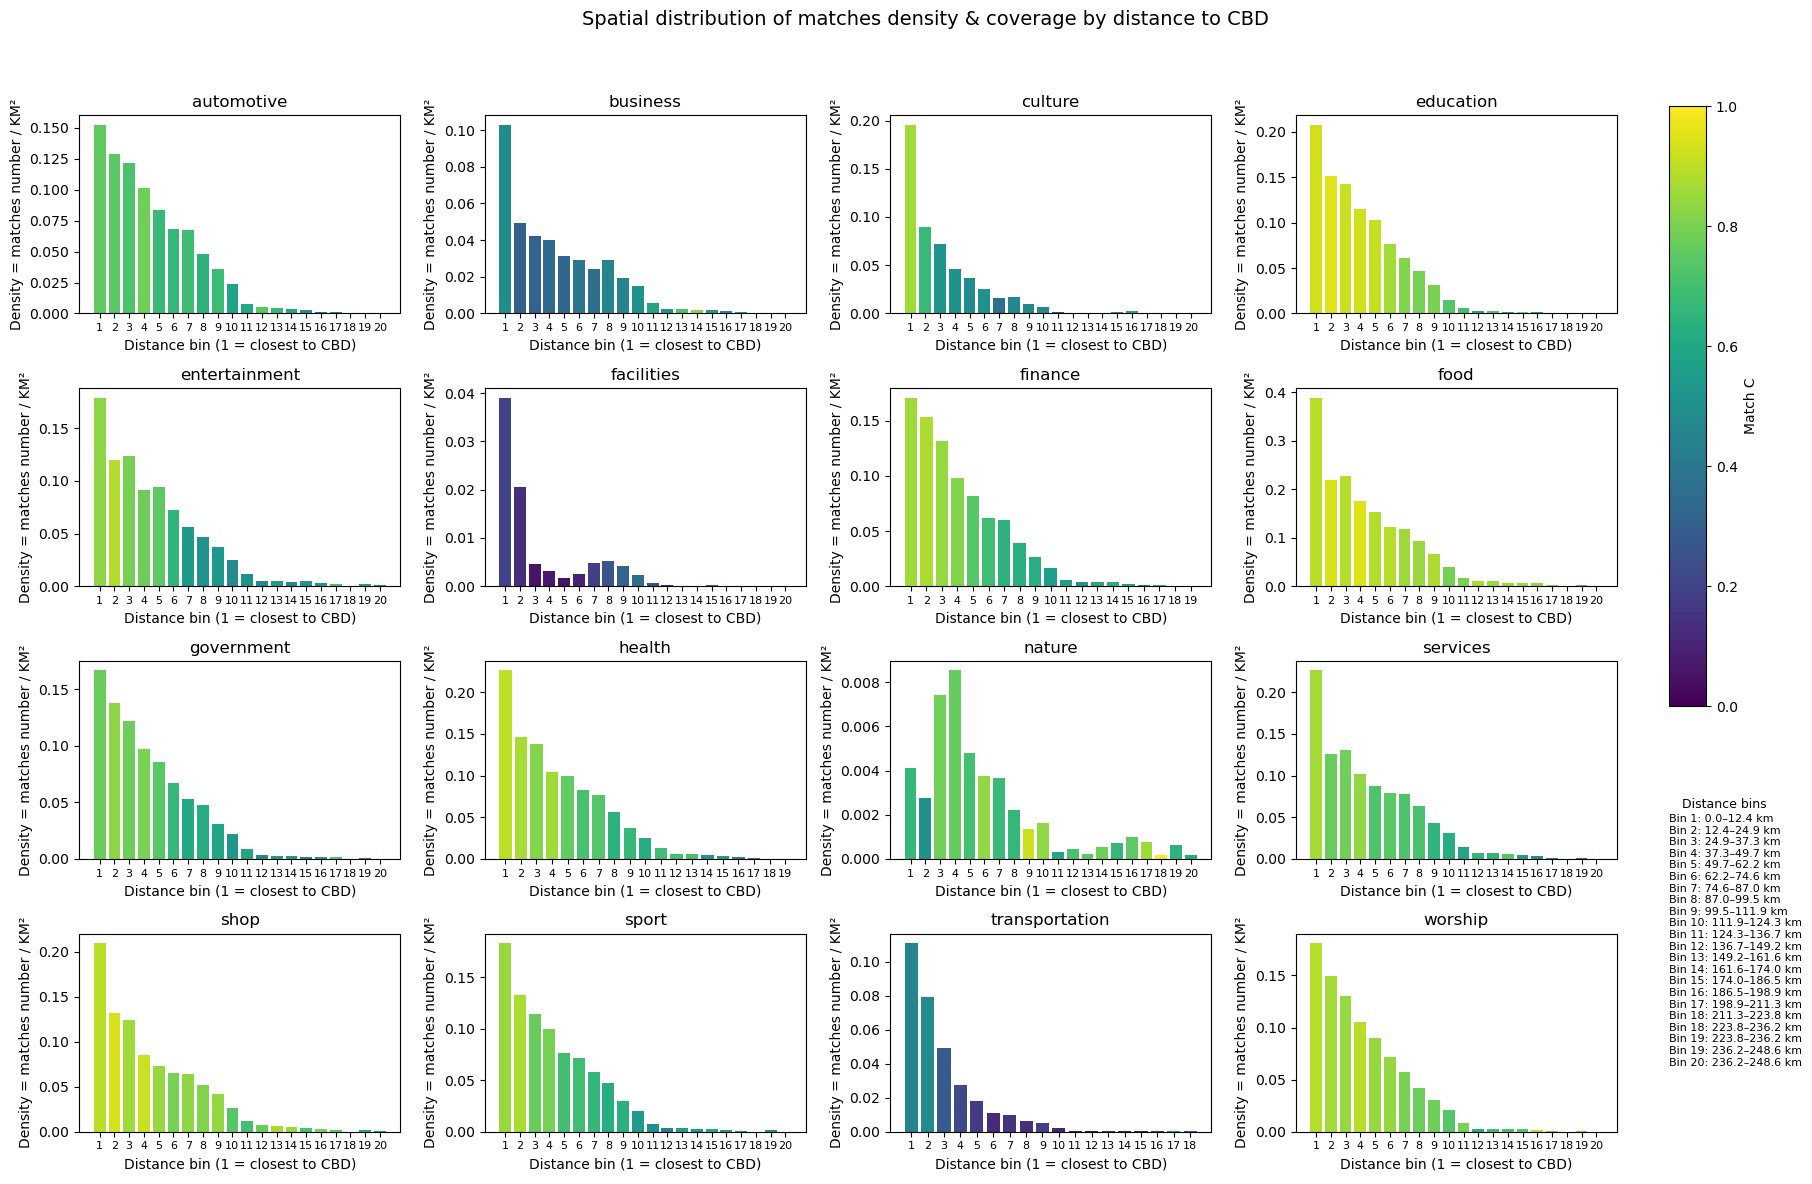

In [147]:
plot_dist_bin_bars(
    df_all_bins,
    color_col="match_c",
    y = 'match_den',
    cmap=plt.cm.viridis,
    xlabel="Distance bin (1 = closest to CBD)",
    ylabel="Density = matches number / KM²",
    title="Spatial distribution of matches density & coverage by distance to CBD",
    n_cols=4,
    xtick_fontsize=8,
)

Conclusion：显著的centrality gradient
Potential conclusion of result:
- 对于overturemap而言，中心区域的点更加accuracy（考虑到很多商铺可能已经搬离或者关闭，但overture map在中心区域更新较好，但是对于远离中心区域的部分更新较慢）
- 中心区域overturemap比较容易命名更加规范，更加容易match？
- 单纯就是中心区的google place的popular points比较多，郊区比较少？

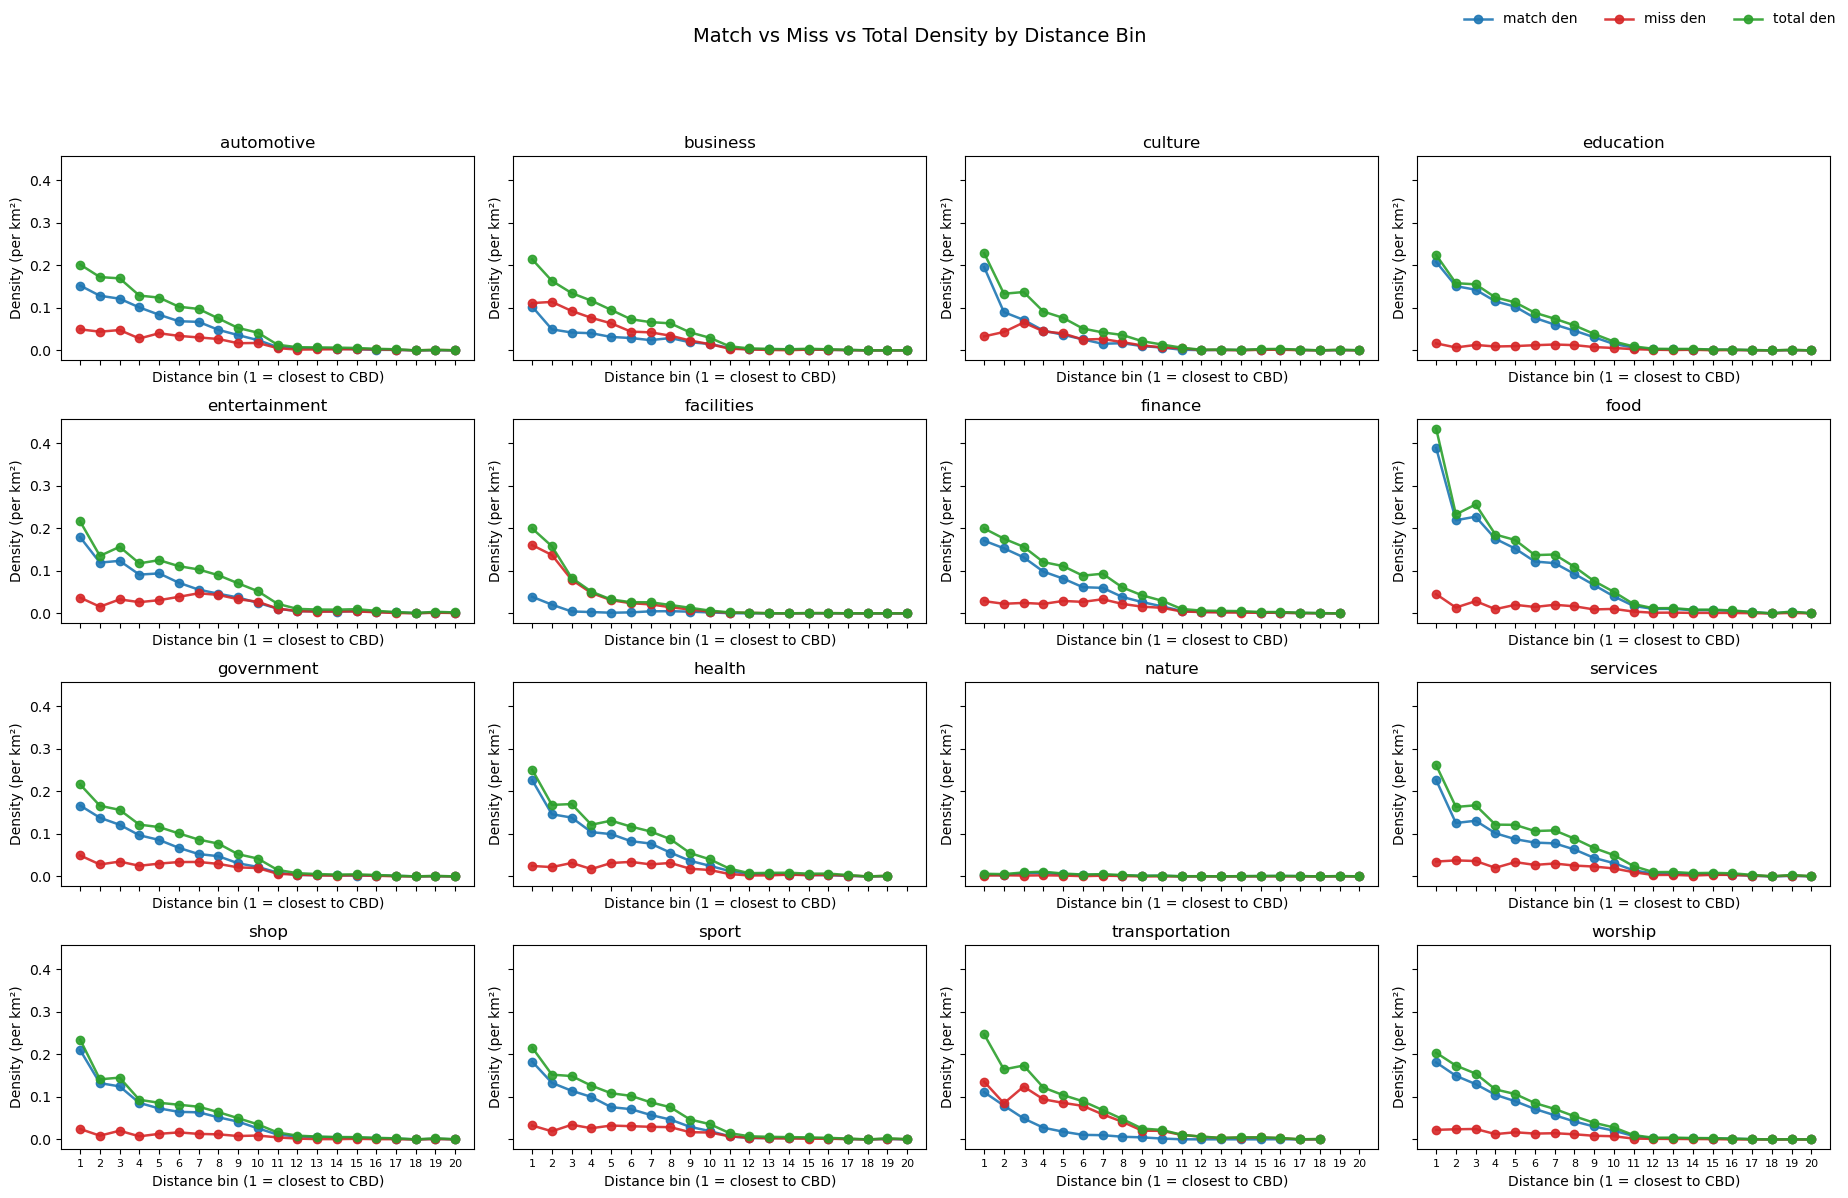

In [148]:
plot_density_compare_by_dist(
    df_all_bins,
    dens_cols=("match_den", "miss_den", "total_den"),
    title="Match vs Miss vs Total Density by Distance Bin"
)

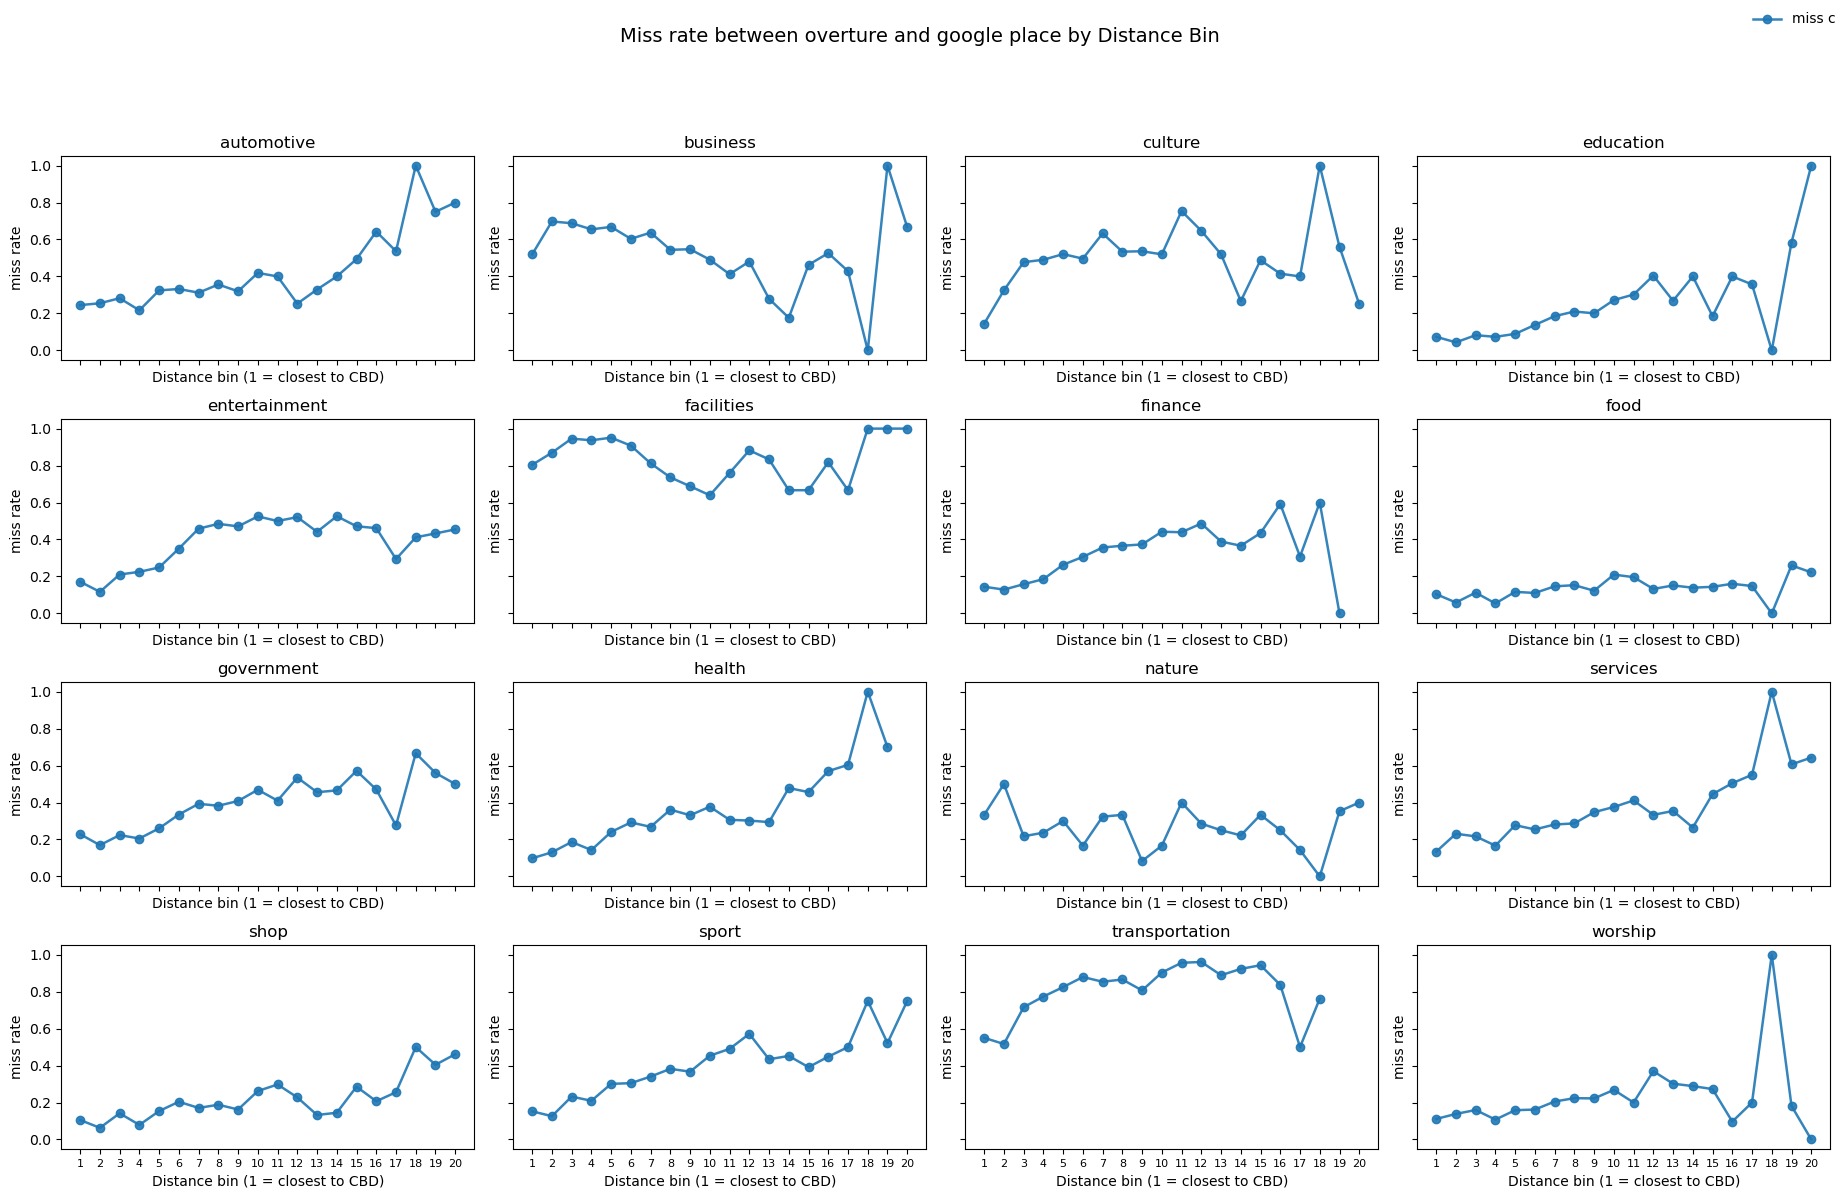

In [ ]:
plot_density_compare_by_dist(
    df_all_bins,
    dens_cols=("miss_c", ),
    title="Miss rate between overture and google place by Distance Bin",
    ylabel="miss rate",
)

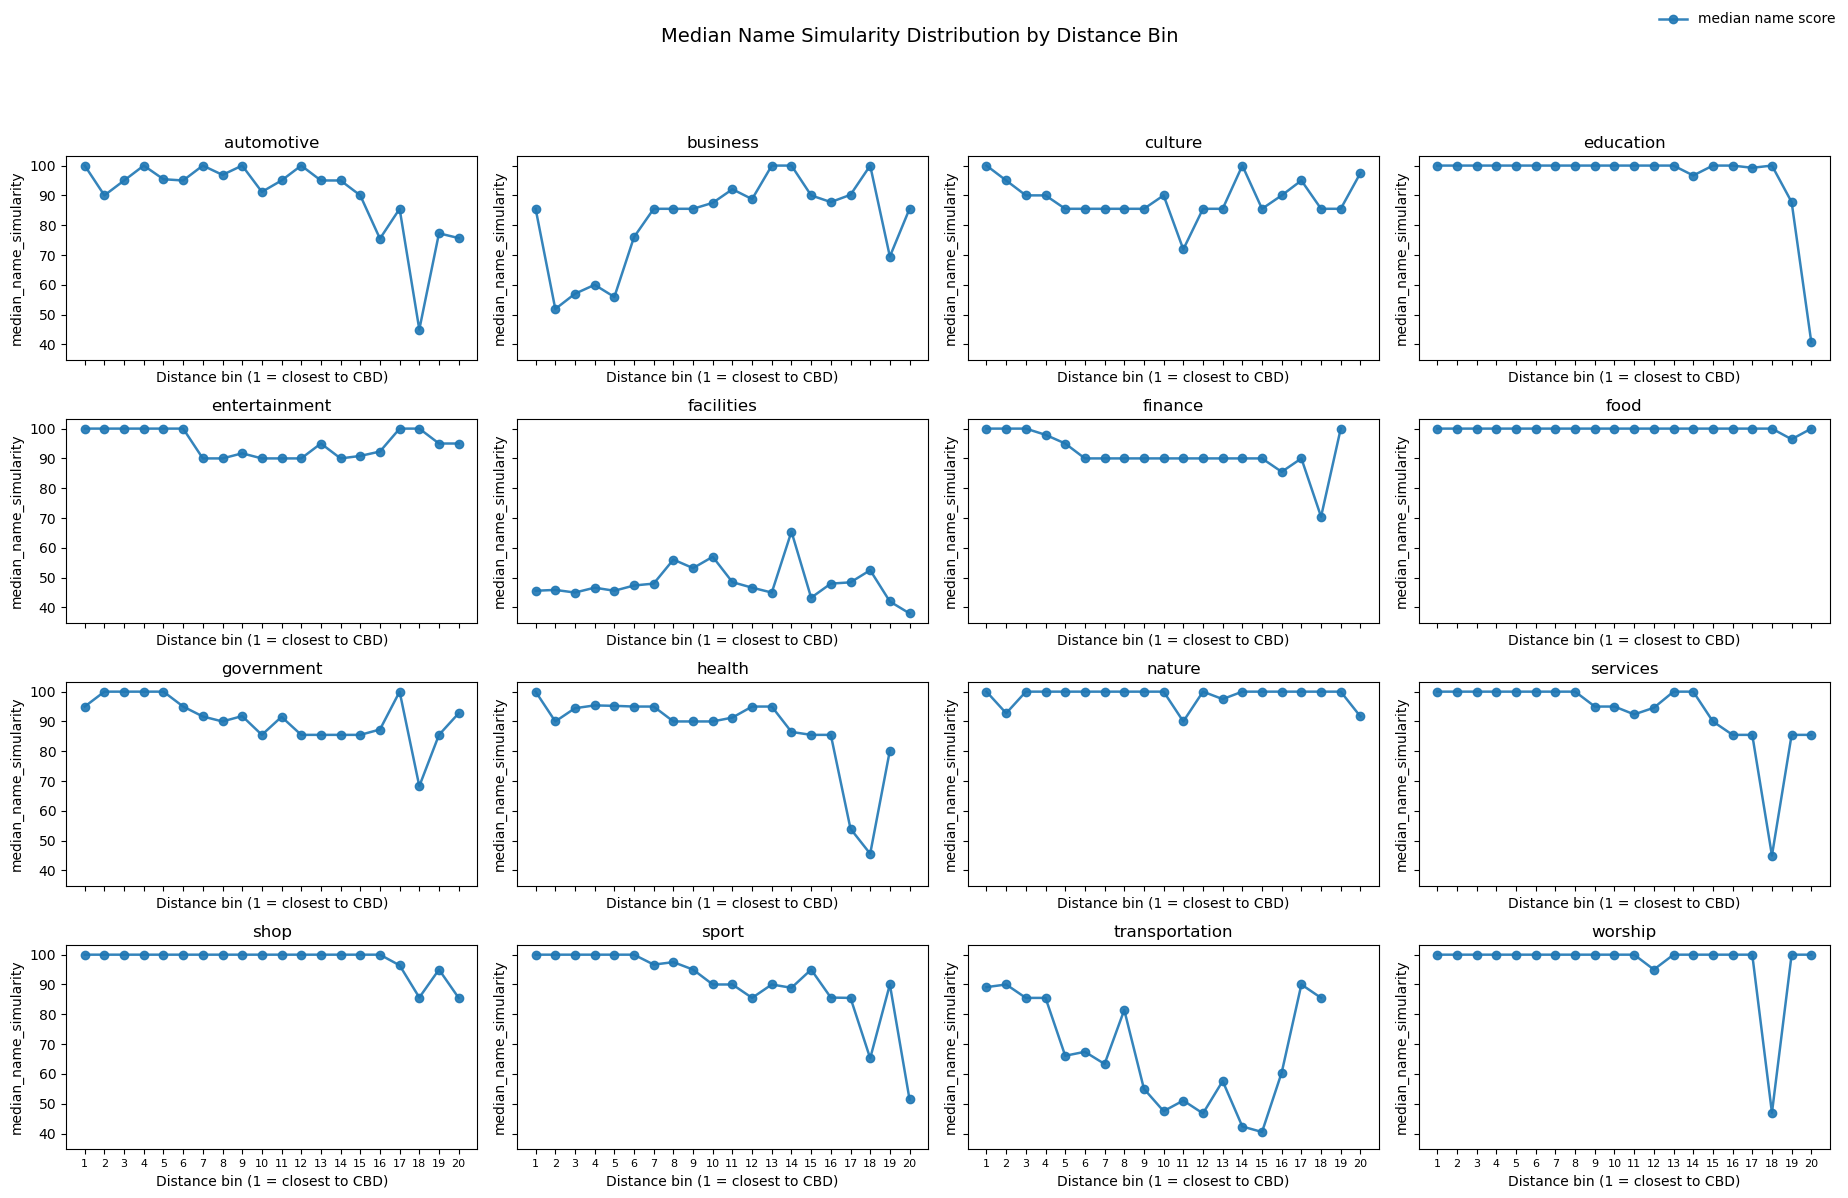

In [149]:
plot_density_compare_by_dist(
    df_all_bins,
    dens_cols=("median_name_score",),
    xlabel="Distance bin (1 = closest to CBD)",
    ylabel="median_name_simularity",
    title="Median Name Simularity Distribution by Distance Bin"
)

In [190]:
df_merge = summarize_category_match_rate(ny_gplc_ove)

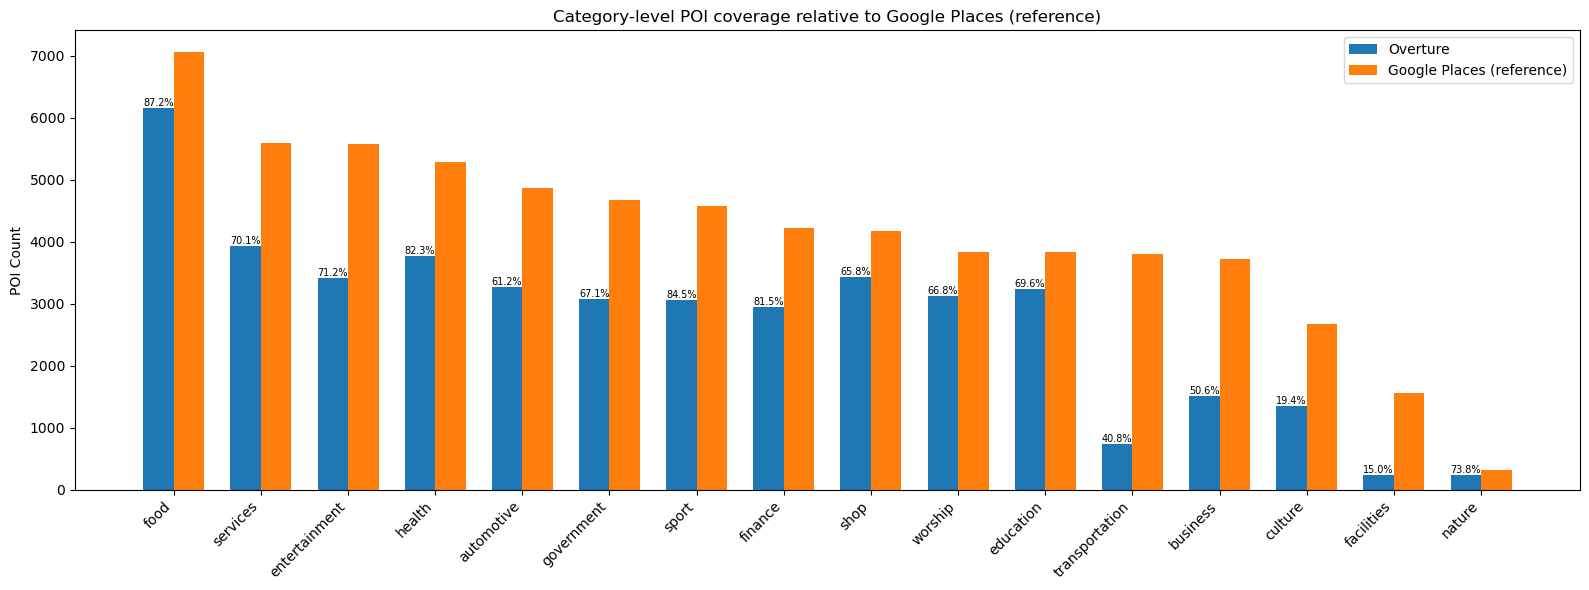

In [208]:
plot_category_coverage_bars(df_merge)

In [154]:
true_match_gplc_ove = ny_gplc_ove[(ny_gplc_ove['is_true_match'] == True) | (ny_gplc_ove['is_true_match'] == "1")]
true_match_gplc_ove['location_distance'] = true_match_gplc_ove['location_distance'].astype(float)

/opt/anaconda3/envs/houpu_py/lib/python3.9/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


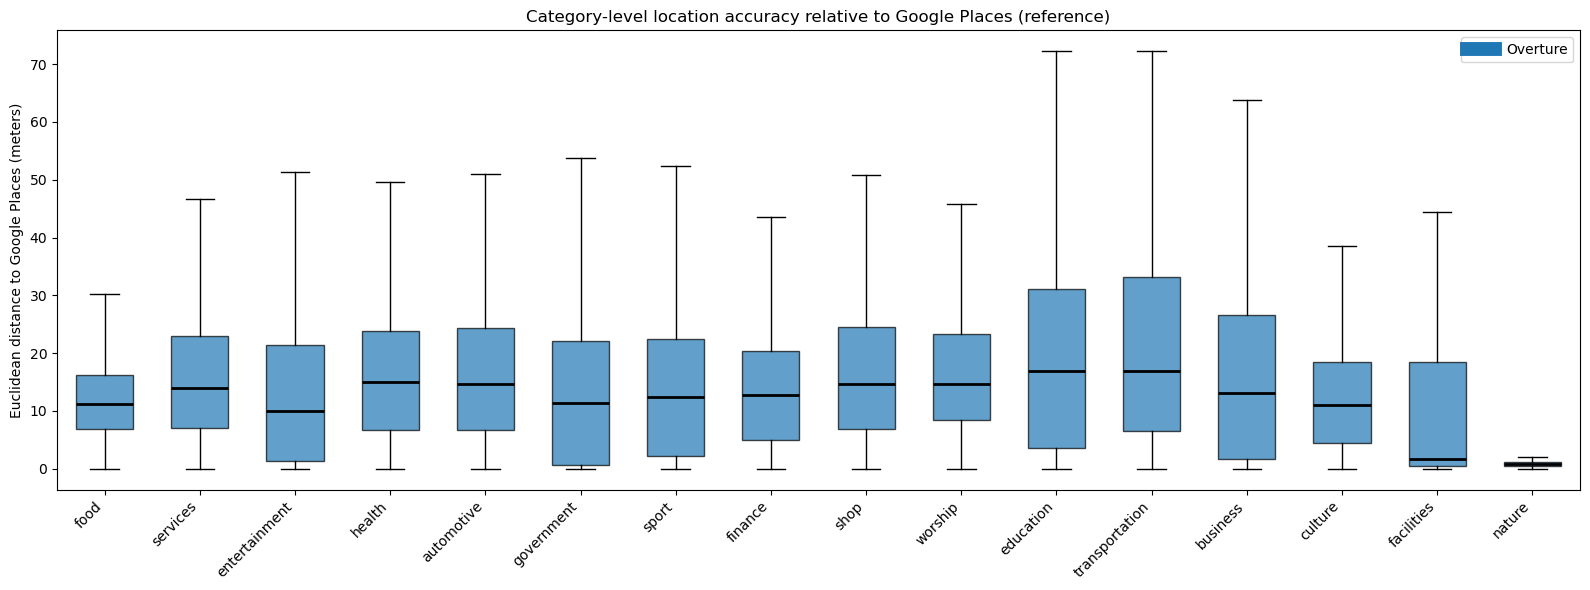

In [155]:
import numpy as np
import matplotlib.pyplot as plt

MAX_DIST = 100
ove_vis = true_match_gplc_ove.query("location_distance <= @MAX_DIST")

# ① category 顺序：按 google_count
cat_order = df_merge.sort_values(
    'google_count', ascending=False
)['primary_cat'].tolist()

cats = [
    c for c in cat_order
    if c in ove_vis['primary_cat'].unique()
]

data_ove = []
cats_clean = []

for c in cats:
    vals = (
        ove_vis.loc[
            ove_vis.primary_cat == c,
            'location_distance'
        ]
        .dropna()
        .astype(float)
        .to_numpy()
    )

    if vals.size >= 1:
        data_ove.append(vals)
        cats_clean.append(c)

plt.figure(figsize=(16, 6))

bp = plt.boxplot(
    data_ove,
    positions=np.arange(len(cats_clean)),
    widths=0.6,
    patch_artist=True,
    showfliers=False   # 不画极端异常值（可选）
)

for box in bp['boxes']:
    box.set_facecolor('#1f77b4')
    box.set_edgecolor('black')
    box.set_alpha(0.7)

for median in bp['medians']:
    median.set_color('black')
    median.set_linewidth(2)

plt.xticks(
    np.arange(len(cats_clean)),
    cats_clean,
    rotation=45,
    ha='right'
)

plt.ylabel("Euclidean distance to Google Places (meters)")
plt.title("Category-level location accuracy relative to Google Places (reference)")

plt.legend(
    handles=[plt.Line2D([0], [0], color='#1f77b4', lw=10, label='Overture')],
    loc='upper right'
)

plt.tight_layout()
plt.show()


# Findings for Overture Maps with DOHMH of NYC

In [193]:
from shapely.geometry import Point
ts_p = Point(-73.98552115962701, 40.757986758482154)

nyc_c_ove = add_distance_bins_to_point(
    nyc_c_ove,
    ts_p,
    n_bins=20,
    src_crs="EPSG:4326",
    proj_crs="EPSG:3857",
    dist_col="dist_to_point",
    bin_col="dist_bin"
)

In [194]:
nyc_c_ove_all_bins = summarize_match_miss_by_dist_bin(
    nyc_c_ove,
    cat_col = "category",
    dist_bin_col = "dist_bin",
    true_col = "is_true_match",
    match_value = '1',
    n_miss_col = "n_miss",
    n_match_col = "n_match",
    miss_c_col = "miss_c",
    match_c_col = "match_c",
    miss_density_col = "miss_den",
    match_density_col = "match_den",
    total_density_col = "total_den", 
    ring_area_col = "ring_area",
    bin_id_col = "bin_id",
    area_unit = "km2",   # "m2" or "km2"
)

/var/folders/s5/1g0kvw1x37z1n8xgxcp8f3lh0000gn/T/ipykernel_23161/816419381.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, right_margin, 0.95])


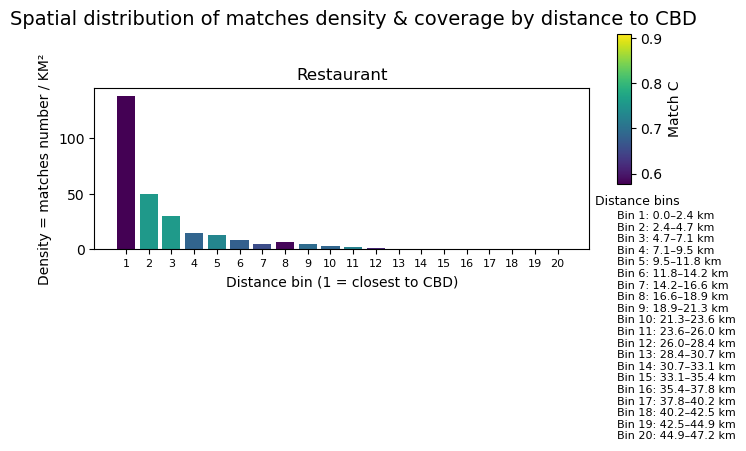

In [195]:
plot_dist_bin_bars(
    nyc_c_ove_all_bins,
    color_col="match_c",
    y = 'match_den',
    cmap=plt.cm.viridis,
    primary_cat_col="category",
    xlabel="Distance bin (1 = closest to CBD)",
    ylabel="Density = matches number / KM²",
    title="Spatial distribution of matches density & coverage by distance to CBD",
    n_cols=1,
    xtick_fontsize=8,
)

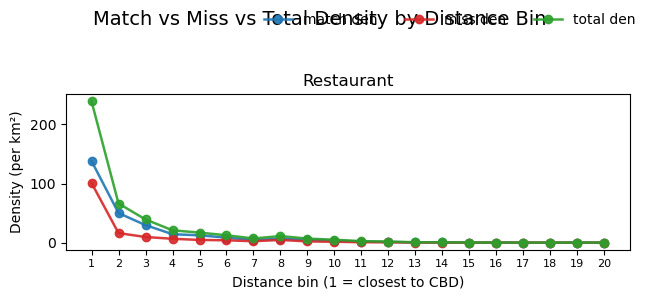

In [279]:
plot_density_compare_by_dist(
    nyc_c_ove_all_bins,
    dens_cols=("match_den", "miss_den", "total_den"),
    primary_cat_col="category",
    title="Match vs Miss vs Total Density by Distance Bin",
    n_cols=1,
)

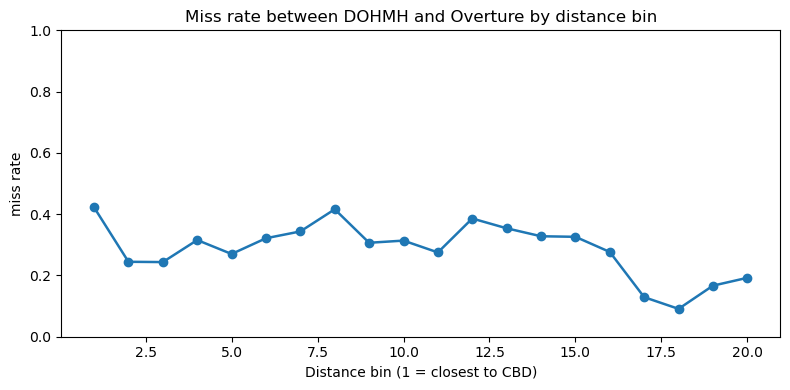

In [295]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(
    nyc_c_ove_all_bins["bin_id"],
    nyc_c_ove_all_bins["miss_c"],
    marker="o",
    linewidth=1.8
)

ax.set_xlabel("Distance bin (1 = closest to CBD)")
ax.set_ylabel("miss rate")
ax.set_title("Miss rate between DOHMH and Overture by distance bin")
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

In [203]:
nyc_c_ove_merge = summarize_category_match_rate(
    nyc_c_ove, 
    cat_col="category",
    ref_col = "dohmh_count",
    compare_col = "ove_count",
    cg_m_col = "ove_dohmh_m",
    )

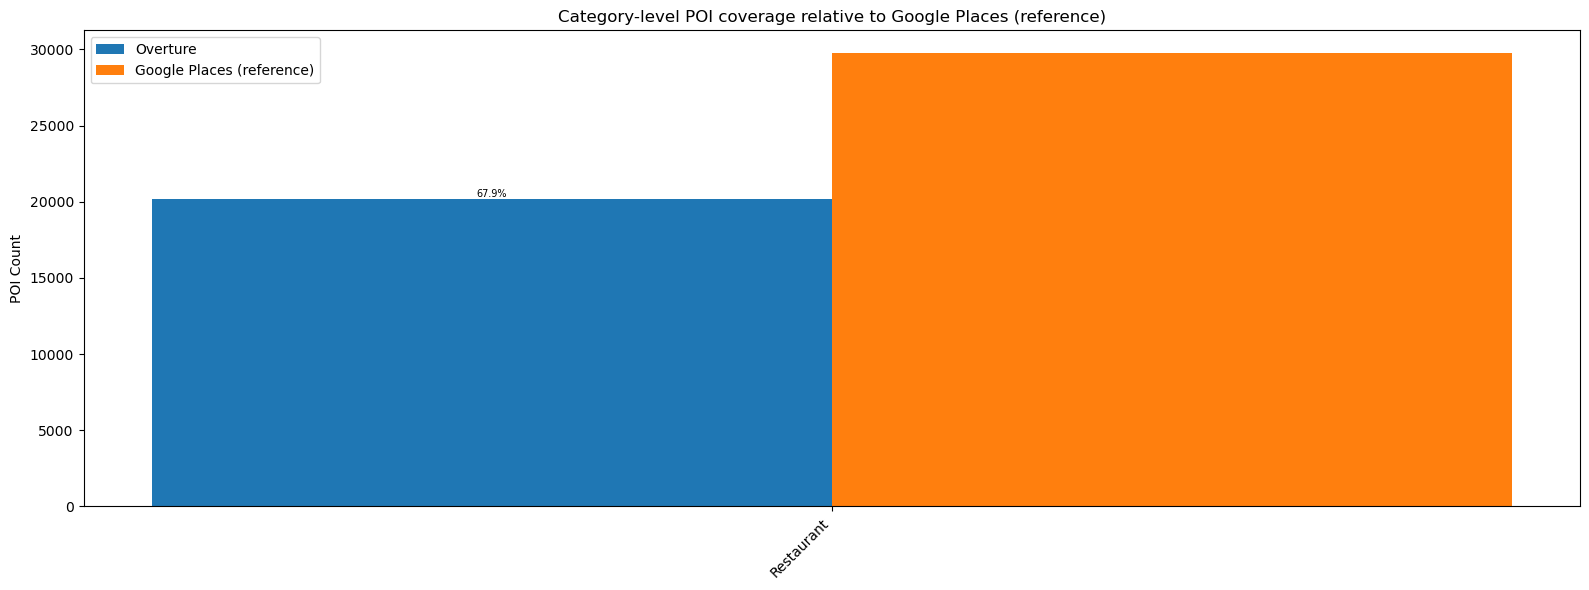

In [210]:
plot_category_coverage_bars(
    nyc_c_ove_merge,
    cat_col="category",
    compare_col="ove_count",
    ref_col="dohmh_count",
    ratio_col="ove_dohmh_m",
    width=0.35,
    figsize=(16, 6),
    ylabel="POI Count",
    title="Category-level POI coverage relative to Google Places (reference)",
    rotate_xticks=45,
    ratio_fmt="{:.1f}%",
    ratio_fontsize=7,
)

In [216]:
true_match_c_ove = nyc_c_ove[(nyc_c_ove['is_true_match'] == True) | (nyc_c_ove['is_true_match'] == "1")]
true_match_c_ove['location_distance'] = true_match_c_ove['location_distance'].astype(float)

/opt/anaconda3/envs/houpu_py/lib/python3.9/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [219]:
nyc_c_ove_merge

,category,ove_count,dohmh_count,g_cat_per,ove_dohmh_m
0,Restaurant,20204,29767,1.0,0.678738


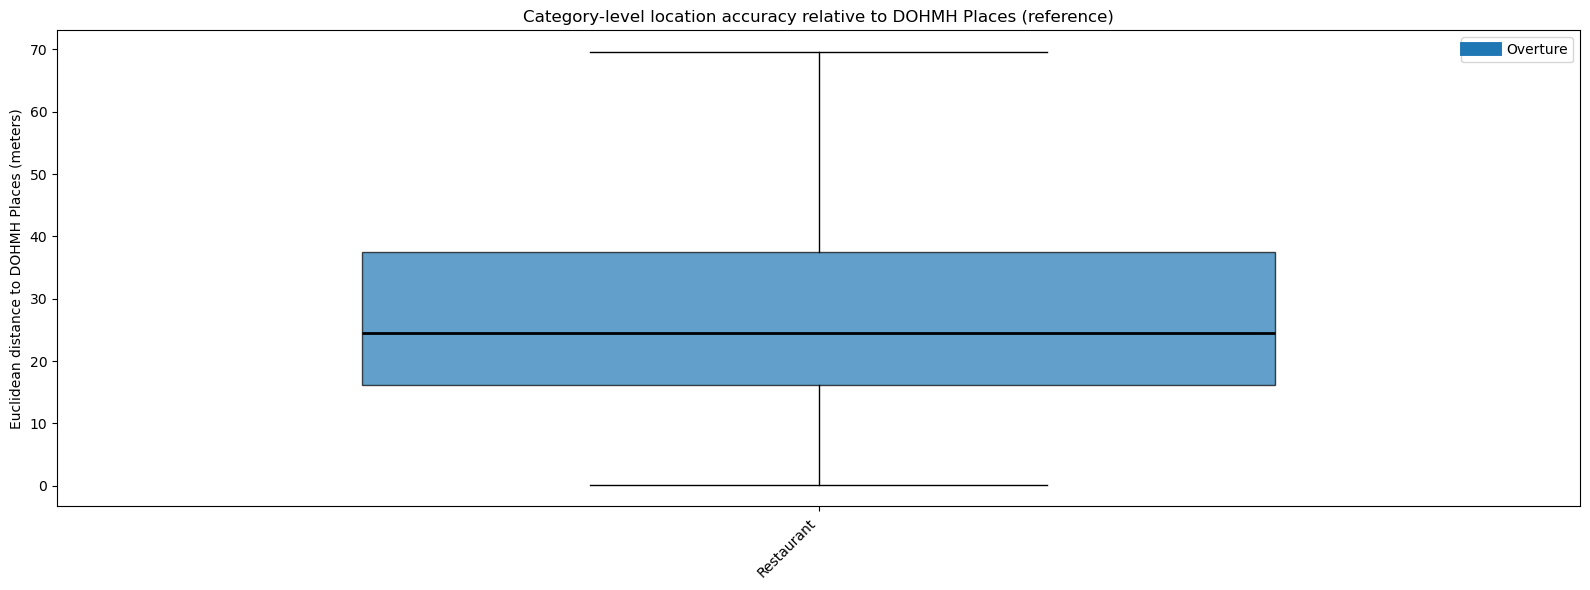

In [220]:
import numpy as np
import matplotlib.pyplot as plt

MAX_DIST = 100
ove_vis = true_match_c_ove.query("location_distance <= @MAX_DIST")

cat_order = nyc_c_ove_merge.sort_values(
    'dohmh_count', ascending=False
)['category'].tolist()

cats = [
    c for c in cat_order
    if c in ove_vis['category'].unique()
]

data_ove = []
cats_clean = []

for c in cats:
    vals = (
        ove_vis.loc[
            ove_vis.category == c,
            'location_distance'
        ]
        .dropna()
        .astype(float)
        .to_numpy()
    )

    if vals.size >= 1:
        data_ove.append(vals)
        cats_clean.append(c)

plt.figure(figsize=(16, 6))

bp = plt.boxplot(
    data_ove,
    positions=np.arange(len(cats_clean)),
    widths=0.6,
    patch_artist=True,
    showfliers=False   # 不画极端异常值（可选）
)

for box in bp['boxes']:
    box.set_facecolor('#1f77b4')
    box.set_edgecolor('black')
    box.set_alpha(0.7)

for median in bp['medians']:
    median.set_color('black')
    median.set_linewidth(2)

plt.xticks(
    np.arange(len(cats_clean)),
    cats_clean,
    rotation=45,
    ha='right'
)

plt.ylabel("Euclidean distance to DOHMH Places (meters)")
plt.title("Category-level location accuracy relative to DOHMH Places (reference)")

plt.legend(
    handles=[plt.Line2D([0], [0], color='#1f77b4', lw=10, label='Overture')],
    loc='upper right'
)

plt.tight_layout()
plt.show()


# Findings for DOHMH with Google places

In [266]:
len(ny_gplc_c[ny_gplc_c['is_true_match'] ==1])/ len(ny_gplc_c)

0.8376068376068376

In [222]:
from shapely.geometry import Point
ts_p = Point(-73.98552115962701, 40.757986758482154)

ny_gplc_c = add_distance_bins_to_point(
    ny_gplc_c,
    ts_p,
    n_bins=20,
    src_crs="EPSG:4326",
    proj_crs="EPSG:3857",
    dist_col="dist_to_point",
    bin_col="dist_bin"
)

In [231]:
ny_gplc_c_all_bins = summarize_match_miss_by_dist_bin(
    ny_gplc_c,
    cat_col = "primary_cat",
    dist_bin_col = "dist_bin",
    true_col = "is_true_match",
    match_value = 1,
    n_miss_col = "n_miss",
    n_match_col = "n_match",
    miss_c_col = "miss_c",
    match_c_col = "match_c",
    miss_density_col = "miss_den",
    match_density_col = "match_den",
    total_density_col = "total_den", 
    ring_area_col = "ring_area",
    bin_id_col = "bin_id",
    area_unit = "km2",   # "m2" or "km2"
)

/var/folders/s5/1g0kvw1x37z1n8xgxcp8f3lh0000gn/T/ipykernel_23161/816419381.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, right_margin, 0.95])


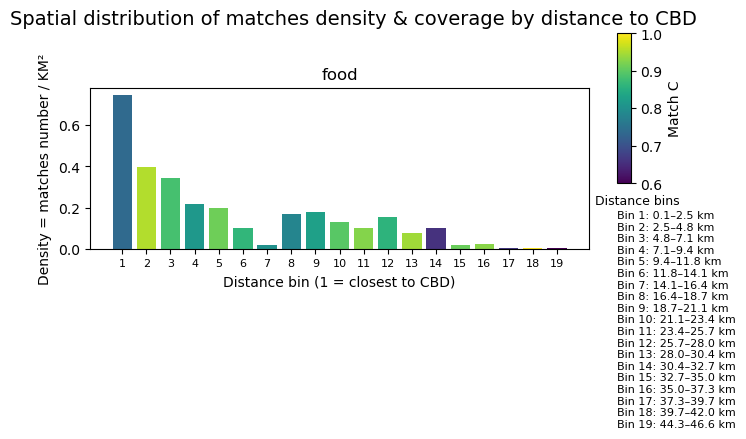

In [233]:
plot_dist_bin_bars(
    ny_gplc_c_all_bins,
    color_col="match_c",
    y = 'match_den',
    cmap=plt.cm.viridis,
    xlabel="Distance bin (1 = closest to CBD)",
    ylabel="Density = matches number / KM²",
    title="Spatial distribution of matches density & coverage by distance to CBD",
    n_cols=1,
    xtick_fontsize=8,
)

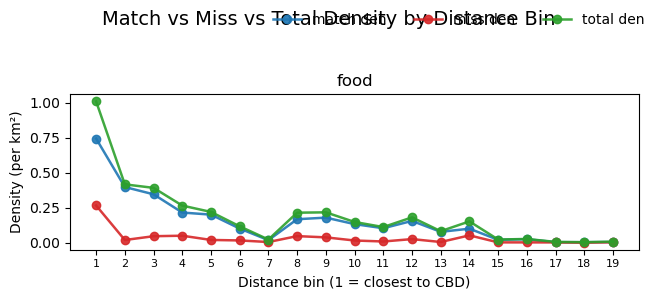

In [235]:
plot_density_compare_by_dist(
    ny_gplc_c_all_bins,
    dens_cols=("match_den", "miss_den", "total_den"),
    title="Match vs Miss vs Total Density by Distance Bin",
    n_cols=1,
)

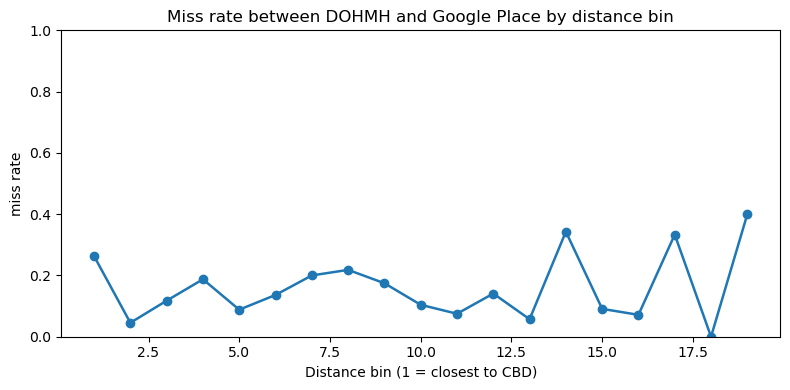

In [298]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(
    ny_gplc_c_all_bins["bin_id"],
    ny_gplc_c_all_bins["miss_c"],
    marker="o",
    linewidth=1.8
)

ax.set_xlabel("Distance bin (1 = closest to CBD)")
ax.set_ylabel("miss rate")
ax.set_title("Miss rate between DOHMH and Google Place by distance bin")
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

In [252]:
ny_gplc_c_merge = summarize_category_match_rate(
    ny_gplc_c, 
    cat_col="primary_cat",
    ref_col = "google_count",
    compare_col = "dohmh_count",
    cg_m_col = "dohmh_google_m",
    )

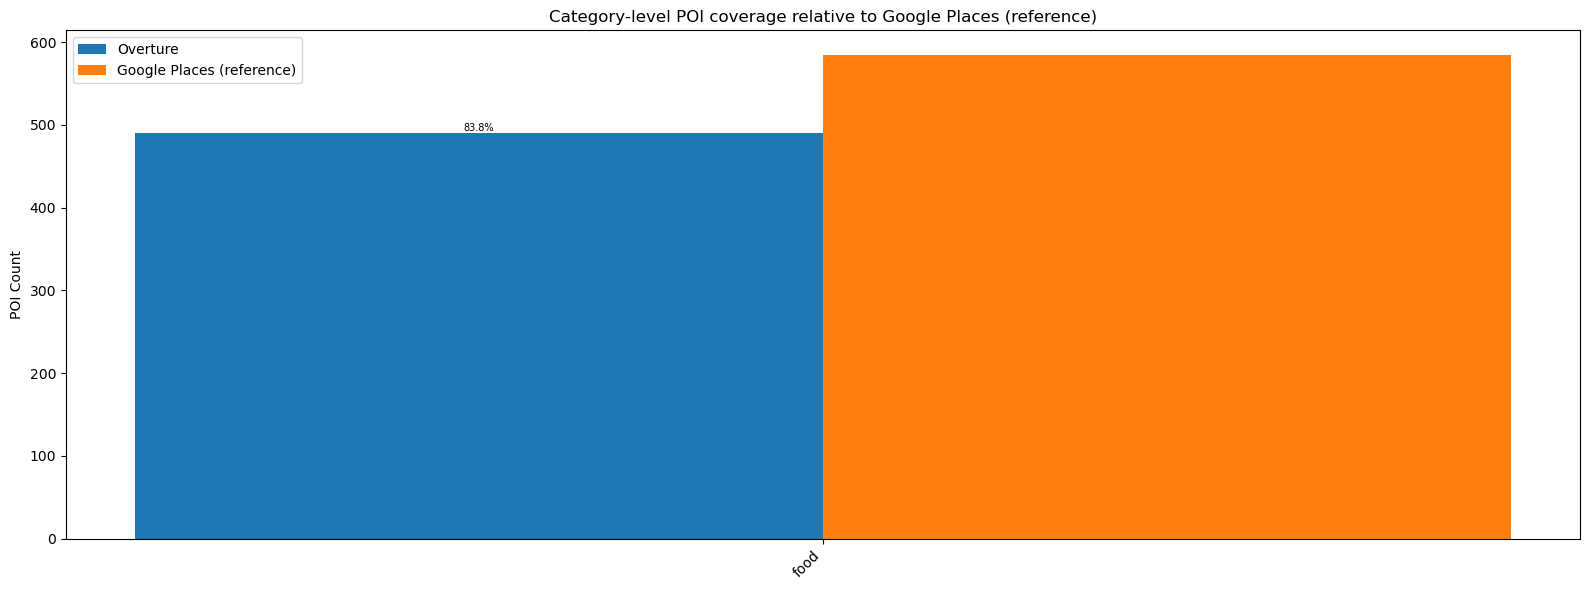

In [255]:
plot_category_coverage_bars(
    ny_gplc_c_merge,
    cat_col="primary_cat",
    compare_col="dohmh_count",
    ref_col="google_count",
    ratio_col="dohmh_google_m",
    width=0.35,
    figsize=(16, 6),
    ylabel="POI Count",
    title="Category-level POI coverage relative to Google Places (reference)",
    rotate_xticks=45,
    ratio_fmt="{:.1f}%",
    ratio_fontsize=7,
)

In [257]:
true_match_gplc_c = ny_gplc_c[(ny_gplc_c['is_true_match'] == True) | (ny_gplc_c['is_true_match'] == "1")]
true_match_gplc_c['location_distance'] = true_match_gplc_c['location_distance'].astype(float)

/opt/anaconda3/envs/houpu_py/lib/python3.9/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


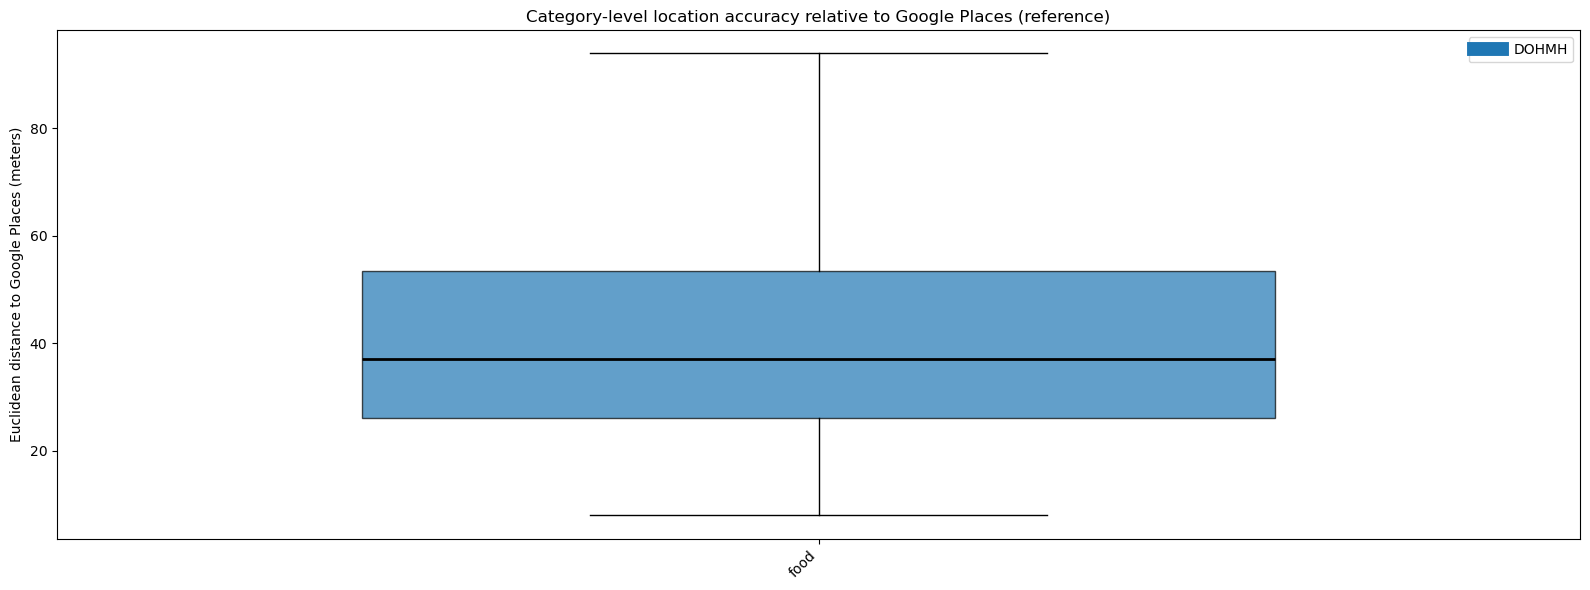

In [260]:
import numpy as np
import matplotlib.pyplot as plt

MAX_DIST = 100
ove_vis = true_match_gplc_c.query("location_distance <= @MAX_DIST")

# ① category 顺序：按 google_count
cat_order = ny_gplc_c_merge.sort_values(
    'google_count', ascending=False
)['primary_cat'].tolist()

cats = [
    c for c in cat_order
    if c in ove_vis['primary_cat'].unique()
]

data_ove = []
cats_clean = []

for c in cats:
    vals = (
        ove_vis.loc[
            ove_vis.primary_cat == c,
            'location_distance'
        ]
        .dropna()
        .astype(float)
        .to_numpy()
    )

    if vals.size >= 1:
        data_ove.append(vals)
        cats_clean.append(c)

plt.figure(figsize=(16, 6))

bp = plt.boxplot(
    data_ove,
    positions=np.arange(len(cats_clean)),
    widths=0.6,
    patch_artist=True,
    showfliers=False   # 不画极端异常值（可选）
)

for box in bp['boxes']:
    box.set_facecolor('#1f77b4')
    box.set_edgecolor('black')
    box.set_alpha(0.7)

for median in bp['medians']:
    median.set_color('black')
    median.set_linewidth(2)

plt.xticks(
    np.arange(len(cats_clean)),
    cats_clean,
    rotation=45,
    ha='right'
)

plt.ylabel("Euclidean distance to Google Places (meters)")
plt.title("Category-level location accuracy relative to Google Places (reference)")

plt.legend(
    handles=[plt.Line2D([0], [0], color='#1f77b4', lw=10, label='DOHMH')],
    loc='upper right'
)

plt.tight_layout()
plt.show()


In [307]:
ny_gplc = gpd.read_file('/Users/houpuli/Redlining Lab Dropbox/HOUPU LI/POI research/google_placescat_5000_clean.geojson')

In [311]:
ny_gplc_c = ny_gplc_c.merge(ny_gplc[['id','primary_type']], on='id', how='left')

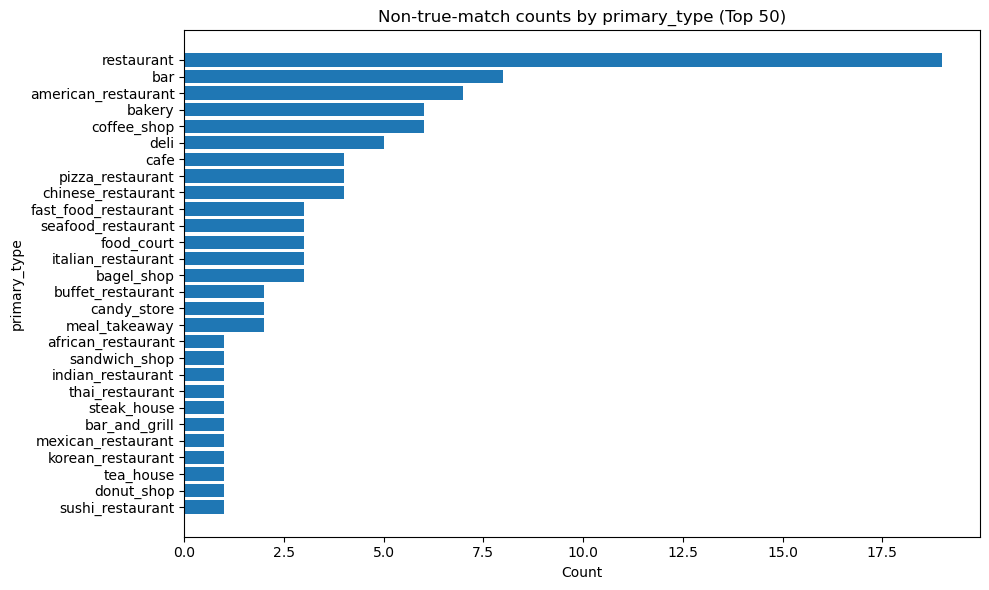

In [ ]:
import matplotlib.pyplot as plt

# 1) subset: not true match
miss = ny_gplc_c.loc[ny_gplc_c["is_true_match"] != 1, "primary_type"].dropna()

# 2) counts (top N to keep readable)
TOP_N = 50
counts = miss.value_counts().head(TOP_N).sort_values()  # sort for nicer horizontal bars

# 3) plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(counts.index.astype(str), counts.values)

ax.set_xlabel("Count")
ax.set_ylabel("primary_type")
ax.set_title(f"Non-true-match counts by primary_type (Top {TOP_N})")

plt.tight_layout()
plt.show()

In [348]:
df_miss = miss.value_counts()
df_miss = pd.DataFrame(df_miss).reset_index().rename(columns={'count':'total_miss'})

miss_list = miss.value_counts().index.tolist()
df_count = pd.DataFrame(ny_gplc_c[ny_gplc_c['primary_type'].isin(miss_list)]['primary_type'].value_counts()).reset_index().rename(columns={'count':'total_count'})

df_miss = df_miss.merge(df_count, on='primary_type', how='left')
df_miss['miss_rate_bysubcat'] = df_miss['total_miss'] / df_miss['total_count']

In [349]:
df_miss

,primary_type,total_miss,total_count,miss_rate_bysubcat
0,restaurant,19,93,0.204301
1,bar,8,45,0.177778
2,american_restaurant,7,43,0.162791
3,bakery,6,31,0.193548
4,coffee_shop,6,40,0.150000
5,deli,5,8,0.625000
6,cafe,4,19,0.210526
7,pizza_restaurant,4,23,0.173913
8,chinese_restaurant,4,28,0.142857
9,seafood_restaurant,3,15,0.200000


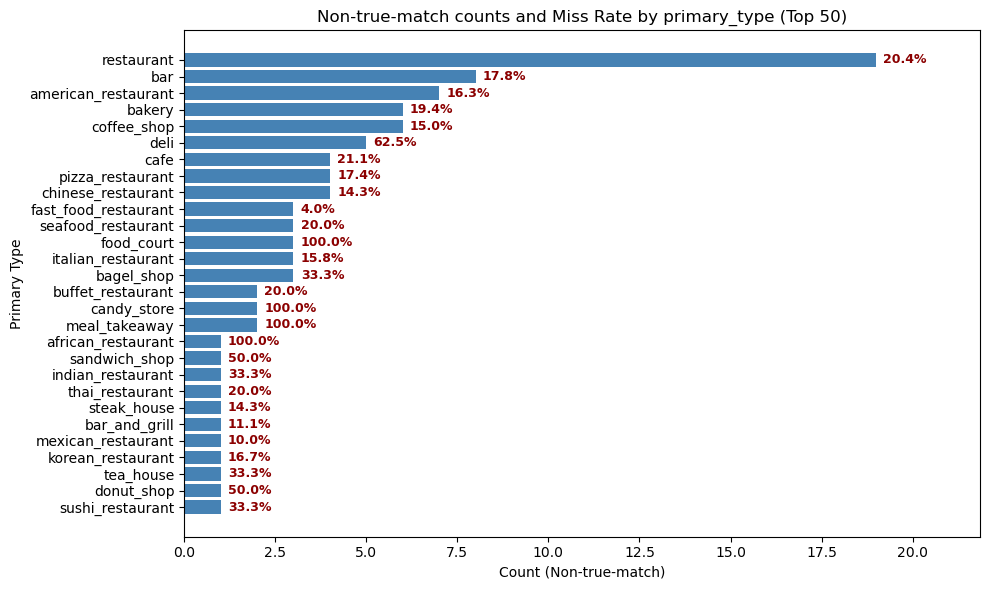

In [352]:
import matplotlib.pyplot as plt
import pandas as pd

# --- 前置数据处理（基于你提供的逻辑） ---
# 1) 计算未匹配数
miss = ny_gplc_c.loc[ny_gplc_c["is_true_match"] != 1, "primary_type"].dropna()
df_miss = miss.value_counts().reset_index().rename(columns={'count':'total_miss'})

# 2) 计算总数并合并得到比例
miss_list = df_miss['primary_type'].tolist()
df_count = pd.DataFrame(ny_gplc_c[ny_gplc_c['primary_type'].isin(miss_list)]['primary_type'].value_counts()).reset_index().rename(columns={'count':'total_count'})

df_miss = df_miss.merge(df_count, on='primary_type', how='left')
df_miss['miss_rate_bysubcat'] = df_miss['total_miss'] / df_miss['total_count']

# --- 绘图部分 ---
TOP_N = 50
# 筛选出要画的 Top N 数据
plot_data = df_miss.head(TOP_N).sort_values('total_miss')

fig, ax = plt.subplots(figsize=(10, 6)) # 适当增加高度以容纳更多标签

# 绘制横向条形图
bars = ax.barh(plot_data['primary_type'], plot_data['total_miss'], color='steelblue')

# 在每个条形图右侧标记比例
for bar, rate in zip(bars, plot_data['miss_rate_bysubcat']):
    width = bar.get_width()
    # 在条形末端右侧 0.2 个单位处标注百分比
    ax.text(width + 0.2,                # x坐标
            bar.get_y() + bar.get_height()/2, # y坐标（条形中间）
            f'{rate:.1%}',             # 格式化为百分比，保留一位小数
            va='center',               # 垂直居中
            ha='left',                 # 水平靠左对齐
            fontsize=9,                # 字体大小
            color='darkred',           # 颜色区分
            fontweight='bold')         # 加粗

ax.set_xlabel("Count (Non-true-match)")
ax.set_ylabel("Primary Type")
ax.set_title(f"Non-true-match counts and Miss Rate by primary_type (Top {TOP_N})")

# 为了给右侧标签留出空间，增加 x 轴上限
ax.set_xlim(0, plot_data['total_miss'].max() * 1.15)

plt.tight_layout()
plt.show()

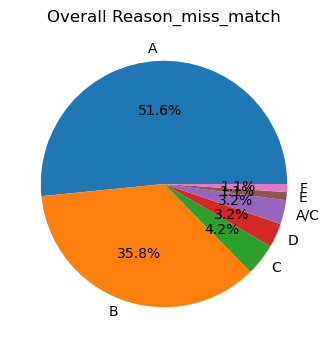

In [ ]:
import matplotlib.pyplot as plt

overall = ny_gplc_c_miss['Reason_miss_match'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(overall, labels=overall.index, autopct='%1.1f%%')
plt.title("Overall Reason_miss_match")
plt.show()

In [671]:
from rapidfuzz import fuzz

s1 = "BELLI BACI BAKERY"
s2 = "BELL"

print("ratio:", fuzz.ratio(s1, s2))
print("QRatio:", fuzz.QRatio(s1, s2))
print("partial_ratio:", fuzz.partial_ratio(s1, s2))
print("token_sort_ratio:", fuzz.token_sort_ratio(s1, s2))
print("token_set_ratio:", fuzz.token_set_ratio(s1, s2))
print("WRatio:", fuzz.WRatio(s1, s2))


ratio: 38.095238095238095
QRatio: 38.095238095238095
partial_ratio: 100.0
token_sort_ratio: 38.095238095238095
token_set_ratio: 38.095238095238095
WRatio: 90.0


In [ ]:
from rapidfuzz import fuzz

s1 = "UMI SUSHI SEAFOOD BUFFET"
s2 = "UMI"

print("ratio:", fuzz.ratio(s1, s2))
print("QRatio:", fuzz.QRatio(s1, s2))
print("partial_ratio:", fuzz.partial_ratio(s1, s2))
print("token_sort_ratio:", fuzz.token_sort_ratio(s1, s2))
print("token_set_ratio:", fuzz.token_set_ratio(s1, s2))
print("WRatio:", fuzz.WRatio(s1, s2))


In [ ]:
from rapidfuzz import fuzz

s1 = "ADMIRALS CLUB"
s2 = "AA ADMIRALS CLUB"

print("ratio:", fuzz.ratio(s1, s2))
print("QRatio:", fuzz.QRatio(s1, s2))
print("partial_ratio:", fuzz.partial_ratio(s1, s2))
print("token_sort_ratio:", fuzz.token_sort_ratio(s1, s2))
print("token_set_ratio:", fuzz.token_set_ratio(s1, s2))
print("WRatio:", fuzz.WRatio(s1, s2))

ratio: 89.65517241379311
QRatio: 89.65517241379311
partial_ratio: 100.0
token_sort_ratio: 89.65517241379311
token_set_ratio: 100.0
WRatio: 95.0


In [433]:
from rapidfuzz import fuzz

s1 = "BORA BORA SMOOTHIE CAFE BRIGHTON BEACH"
s2 = "BORA BORA SMOOTHIE CAFE SHEEL MASHI"

print("ratio:", fuzz.ratio(s1, s2))
print("QRatio:", fuzz.QRatio(s1, s2))
print("partial_ratio:", fuzz.partial_ratio(s1, s2))
print("token_sort_ratio:", fuzz.token_sort_ratio(s1, s2))
print("token_set_ratio:", fuzz.token_set_ratio(s1, s2))
print("WRatio:", fuzz.WRatio(s1, s2))


ratio: 76.71232876712328
QRatio: 76.71232876712328
partial_ratio: 81.35593220338984
token_sort_ratio: 63.01369863013699
token_set_ratio: 75.0
WRatio: 76.71232876712328


In [417]:
from rapidfuzz import fuzz

s1 = "YA YA ROASTED"
s2 = "YA YA BARBECUE INC"

print("ratio:", fuzz.ratio(s1, s2))
print("QRatio:", fuzz.QRatio(s1, s2))
print("partial_ratio:", fuzz.partial_ratio(s1, s2))
print("token_sort_ratio:", fuzz.token_sort_ratio(s1, s2))
print("token_set_ratio:", fuzz.token_set_ratio(s1, s2))
print("WRatio:", fuzz.WRatio(s1, s2))


ratio: 51.61290322580645
QRatio: 51.61290322580645
partial_ratio: 66.66666666666667
token_sort_ratio: 51.61290322580645
token_set_ratio: 40.0
WRatio: 51.61290322580645


In [ ]:
from rapidfuzz import fuzz

s1 = "New York Pizza"
s2 = "Pizza New York"

print("ratio:", fuzz.ratio(s1, s2))
print("QRatio:", fuzz.QRatio(s1, s2))
print("partial_ratio:", fuzz.partial_ratio(s1, s2))
print("token_sort_ratio:", fuzz.token_sort_ratio(s1, s2))
print("token_set_ratio:", fuzz.token_set_ratio(s1, s2))
print("WRatio:", fuzz.WRatio(s1, s2))

ratio: 57.14285714285714
QRatio: 57.14285714285714
partial_ratio: 72.72727272727273
token_sort_ratio: 100.0
token_set_ratio: 100.0
WRatio: 95.0


In [559]:
s1 = "BORA BORA SMOOTHIE BRIGHTON BEACH"
s2 = "BORA BORA SMOOTHIE SHEEL MASHI"

print("ratio:", fuzz.ratio(s1, s2))
print("QRatio:", fuzz.QRatio(s1, s2))
print("partial_ratio:", fuzz.partial_ratio(s1, s2))
print("token_sort_ratio:", fuzz.token_sort_ratio(s1, s2))
print("token_set_ratio:", fuzz.token_set_ratio(s1, s2))
print("WRatio:", fuzz.WRatio(s1, s2))

ratio: 73.01587301587303
QRatio: 73.01587301587303
partial_ratio: 77.55102040816327
token_sort_ratio: 66.66666666666667
token_set_ratio: 68.42105263157895
WRatio: 73.01587301587303


#### combine with partial_ratio 

In [523]:
from difflib import SequenceMatcher

def longest_common_substring(a, b):
    match = SequenceMatcher(None, a, b).find_longest_match(0, len(a), 0, len(b))
    return a[match.a: match.a + match.size]

s1 = "BORA BORA SMOOTHIE CAFE - BRIGHTON BEACH"
s2 = "BORA BORA SMOOTHIE CAFE/ SHEEL & MASHI"

print(longest_common_substring(s1, s2))

core = longest_common_substring(s1, s2)
LCS_coverage = len(core) / min(len(s1), len(s2))
print(LCS_coverage)

BORA BORA SMOOTHIE CAFE
0.6052631578947368


## Test for new match methodology

In [560]:
### read_dohmh_file
dohmh_res = gpd.read_file('/Users/houpuli/Redlining Lab Dropbox/HOUPU LI/POI research/nyc_city/DOHMH_New_York_City_Restaurant_Inspection_Results_20251227.geojson')
dohmh_res = dohmh_res.rename(columns={':id':'id',':version':'version',':created_at':'created_at',':updated_at':'updated_at','dba':'name'})
dohmh_res['updated_year'] = pd.to_datetime(dohmh_res['updated_at']).dt.year
dohmh_res["address"] = (dohmh_res["building"].astype(str) + " " + dohmh_res["street"])
# dohmh_res = dohmh_res[['id','version','name','address','updated_year','geometry']]
dohmh_res['category'] = 'Restaurant'
dohmh_res=  dohmh_res.dropna(subset=['geometry']).reset_index(drop=True)
dohmh_res = dohmh_res.drop_duplicates(subset=['name','address','updated_year','geometry']).reset_index(drop=True)
dohmh_res

,id,version,created_at,updated_at,camis,name,boro,building,street,zipcode,...,bbl,nta,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_sbqj_enih,:@computed_region_92fq_4b7q,geometry,updated_year,address,category
0,row-3rda.zmw6_xp4m,rv-pdr7_f9vf.8tba,2025-12-26 23:03:04.320000+00:00,2025-12-26 23:04:03.556000+00:00,50153196,KETEA,Queens,36-12,MAIN STREET,11354,...,4049710041,QN22,22,3,67,3,POINT (-73.83171 40.76252),2025,36-12 MAIN STREET,Restaurant
1,row-ytqa~g2vr.6a5z,rv-59qb.f9a2_ueuj,2025-12-26 23:03:04.320000+00:00,2025-12-26 23:04:03.556000+00:00,50169800,APPLE BLOSSOM,Queens,40-05,SKILLMAN AVENUE,11104,...,4001830292,QN31,53,3,66,33,POINT (-73.92342 40.74720),2025,40-05 SKILLMAN AVENUE,Restaurant
2,row-rx7s_2p9t-iqp4,rv-tek2-4v6w_zjc6,2025-12-26 23:03:04.320000+00:00,2025-12-26 23:04:03.556000+00:00,50176849,THE BLUE BLOSSOM,Brooklyn,135,NORTH 5 STREET,11249,...,3023350029,BK73,36,2,57,38,POINT (-73.95925 40.71694),2025,135 NORTH 5 STREET,Restaurant
3,row-bjv9.8q5f~gtur,rv-naqd~wgdf.tvjs,2025-12-26 23:03:04.320000+00:00,2025-12-26 23:04:03.556000+00:00,50180060,GREENLAND DELI PLUS CORP,Bronx,4311,KATONAH AVENUE,10470,...,2033780057,BX62,29,5,30,40,POINT (-73.86747 40.89905),2025,4311 KATONAH AVENUE,Restaurant
4,row-fn6x.ecsd-rr8d,rv-r2u5-2k5n.i3cs,2025-12-26 23:03:04.320000+00:00,2025-12-26 23:04:03.556000+00:00,50177809,FERMENTO,Manhattan,226,VARICK STREET,10014,...,1005280056,MN23,57,4,3,10,POINT (-74.00523 40.72913),2025,226 VARICK STREET,Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29762,row-ym4t.mqkm.3x6i,rv-zbkb_xwgn-qq6y,2025-12-26 23:03:04.320000+00:00,2025-12-26 23:05:58.023000+00:00,50177902,ARTHOUSE,Brooklyn,2717,AVENUE U,11229,...,3073320048,BK44,32,2,36,8,POINT (-73.94450 40.60014),2025,2717 AVENUE U,Restaurant
29763,row-aqni_a5n2.jh4z,rv-qhys.eupn-mnyz,2025-12-26 23:03:04.320000+00:00,2025-12-26 23:05:58.023000+00:00,50177834,RAMEN BY RA,Manhattan,70,EAST 1 STREET,10003,...,1004430040,MN22,70,4,5,50,POINT (-73.98877 40.72341),2025,70 EAST 1 STREET,Restaurant
29764,row-4tez.e9t5~h2pz,rv-ntr4-wi27_6rec,2025-12-26 23:03:04.320000+00:00,2025-12-26 23:05:58.023000+00:00,50172734,EARTHBAR,Manhattan,69,PRINCE STREET,10012,...,1005110001,MN24,57,4,2,32,POINT (-73.99707 40.72393),2025,69 PRINCE STREET,Restaurant
29765,row-n9j7-7v3f~i36m,rv-hd2r.v9w7~64zn,2025-12-26 23:03:04.320000+00:00,2025-12-26 23:05:58.023000+00:00,50163793,ERNST & YOUNG - 8TH FLOOR,Manhattan,1,MANHATTAN WEST,10001,...,1007297504,MN13,12,4,6,10,POINT (-73.99713 40.75226),2025,1 MANHATTAN WEST,Restaurant


In [572]:
ny_gplc = gpd.read_file('/Users/houpuli/Redlining Lab Dropbox/HOUPU LI/POI research/google_placescat_5000_clean.geojson')
ny_gplc['addr_simple'] = ny_gplc['address'].str.split(',', n=1).str[0]

nyc_ct = gpd.read_file('/Users/houpuli/Downloads/NYC_Borough_Boundary_5648926780594355063.geojson')
nyc_ct_geom = nyc_ct.dissolve()
nyc_ct_geom = nyc_ct_geom[['geometry']]

nyc_gplc = ny_gplc.sjoin(nyc_ct_geom, how='inner', predicate='intersects').drop(columns=['index_right'])
nyc_gplc_food = nyc_gplc[nyc_gplc['primary_cat']=='food']
nyc_gplc_food

,circle_id,id,name,address,primary_type,lat,lon,primary_cat,geometry,addr_simple
27474,108,ChIJKa9zTFtKwokRU2HJ12JnXBs,Belli Baci Bakery.,"7358 Amboy Rd, Staten Island, NY 10307, USA",bakery,40.510533,-74.242272,food,POINT (-74.24227 40.51053),7358 Amboy Rd
27476,108,ChIJl8GODJzKw4kRIa6MfpzFw8A,Cracker Barrel Deli,"180 Main St, Staten Island, NY 10307, USA",deli,40.510567,-74.248541,food,POINT (-74.24854 40.51057),180 Main St
27618,123,ChIJOyOxW1m1w4kRX135VQ1AeMQ,McDonald's,"260 Page Ave, Staten Island, NY 10307, USA",fast_food_restaurant,40.517736,-74.234752,food,POINT (-74.23475 40.51774),260 Page Ave
27626,124,ChIJM5bI6WhJwokRj9GNkxvXnYs,Paris Baguette,"2742 Hylan Blvd, Staten Island, NY 10306, USA",bakery,40.564579,-74.113905,food,POINT (-74.11391 40.56458),2742 Hylan Blvd
27627,124,ChIJAU-quKBLwokRkSe_AEI9SV8,McDonald's,"3267 Richmond Ave, Staten Island, NY 10312, USA",fast_food_restaurant,40.559647,-74.168193,food,POINT (-74.16819 40.55965),3267 Richmond Ave
...,...,...,...,...,...,...,...,...,...,...
32521,253,ChIJ1RfMugf0wokR9plYzcTb04Y,Republica Restaurant Rooftop & Lounge,"160 Dyckman St, New York, NY 10040, USA",restaurant,40.863628,-73.926338,food,POINT (-73.92634 40.86363),160 Dyckman St
32524,254,ChIJAQAQfEnzwokR5cXlw6wWYxU,Code Red Restaurant & Lounge,"1320 E Gun Hill Rd, Bronx, NY 10469, USA",restaurant,40.871194,-73.848109,food,POINT (-73.84811 40.87119),1320 E Gun Hill Rd
32525,254,ChIJ4bqLakONwokRgverxD9jjE8,KPOT Korean BBQ & Hot Pot,"200 Baychester Ave 207A (2nd Floor, Bronx, NY ...",korean_restaurant,40.864270,-73.828121,food,POINT (-73.82812 40.86427),200 Baychester Ave 207A (2nd Floor
32527,254,ChIJw6EmV7qMwokRqwG2xMcSOpM,Olive Garden Italian Restaurant,"200 Baychester Ave Suite 208A, Bronx, NY 10475...",italian_restaurant,40.864432,-73.827730,food,POINT (-73.82773 40.86443),200 Baychester Ave Suite 208A


In [711]:
import numpy as np
import geopandas as gpd
from scipy.spatial import cKDTree

def search_spatial_candidates(
    reference_gdf: gpd.GeoDataFrame,
    compared_gdf: gpd.GeoDataFrame,
    k: int = 100,
    max_dist: float = 1000, 
    id_col: str = "id",
    crs_for_distance: int = 3857,
):
    """
    Attach k nearest compared POI ids & distances to reference_gdf.

    Returns
    -------
    GeoDataFrame with two new columns:
    - cand_ids   : list of compared ids
    - cand_dist_m: list of distances (meters)
    """

    ref_proj = reference_gdf.to_crs(crs_for_distance)
    cmp_proj = compared_gdf.to_crs(crs_for_distance)

    ref_xy = np.column_stack([ref_proj.geometry.x, ref_proj.geometry.y])
    cmp_xy = np.column_stack([cmp_proj.geometry.x, cmp_proj.geometry.y])

    tree = cKDTree(cmp_xy)
    k_eff = min(k, len(compared_gdf))

    dist, idx = tree.query(ref_xy, k=k_eff)

    if k_eff == 1:
        dist = dist.reshape(-1, 1)
        idx = idx.reshape(-1, 1)

    cmp_ids = compared_gdf[id_col].to_numpy()

    cand_ids = []
    cand_dists = []

    for row_idx, row_dist in zip(idx, dist):
        ids = []
        dists = []

        for j, d in zip(row_idx, row_dist):
            if d <= max_dist:
                ids.append(cmp_ids[j])
                dists.append(d)

        cand_ids.append(ids)
        cand_dists.append(dists)

    result = reference_gdf.copy()
    result["cand_ids"] = cand_ids
    result["cand_dist_m"] = cand_dists

    return result

In [575]:
FOOD_WORDS = {
    "RESTAURANT","RESTURANT","RESTARAUNT",
    "CAFE","CAFÉ","COFFEE","BAR","BISTRO","GRILL",
    "KITCHEN","DINER","EATERY","STEAKHOUSE",
    "SEAFOOD","BUFFET","BBQ","PIZZA","SUSHI","RAMEN",
    "NOODLE","NOODLES","BURGER","BURGERS","TACO","TACOS",
    "CHICKEN","WINGS","BAKERY","DELI","DELICATESSEN",
    "COURT","FOOD","EXPRESS","HOUSE","SHOP"
}

PLACE_WORDS = {
    "HALL","CENTER","CENTRE","PLAZA","MARKET","MALL",
    "GARDEN","GARDENS","PARK","SQUARE","TOWER","TOWERS",
    "STATION","TERMINAL","BUILDING","GALLERY","THEATER","SCHOOL","COURT","INN",
    "HOTEL","MOTEL","INN","SUITES","SUITE",
    "SPA","SALON","STUDIO","CENTER","CENTRE",
    "CLUB","LOUNGE","STATION","STOP"
}

LEGAL_WORDS = {
    "LLC","INC","CORP","CORPORATION","CO","COMPANY",
    "LTD","LIMITED","GROUP","HOLDINGS","OFFICE"
}

GRAMMAR = {
    "THE","OF","AT","AND","FOR","IN","ON","BY","WITH","TO","FROM"
}

NON_PRIMARY_TOKENS = FOOD_WORDS | PLACE_WORDS | LEGAL_WORDS | GRAMMAR

In [682]:

from rapidfuzz import process, fuzz
import pandas as pd
import re
import unicodedata


def clean_name(s):
    if not isinstance(s, str):
        return ""

    s = unicodedata.normalize("NFKD", s)
    s = "".join(c for c in s if not unicodedata.combining(c)) # 1. unicode normalize (remove accents)
    s = s.upper() # 2. uppercase
    s = re.sub(r"\([^)]*\)", "", s) 
    s = s.encode("ascii", errors="ignore").decode() # 4. remove emoji / non ascii
    s = re.sub(r"[^\w\s]", " ", s) # 5. replace special chars with space
    s = re.sub(r"\s+", " ", s) # 6. collapse spaces

    return s.strip()

def extract_prinmary_str(name):

    tokens = name.split()
    core = [t for t in tokens if t not in NON_PRIMARY_TOKENS]
    if len(core) == 1 and len(core[0]) < 3:
        return name
    if core:
        return " ".join(core)
    return name

def match_by_name(
    reference_gdf: gpd.GeoDataFrame,
    compared_gdf: gpd.GeoDataFrame,
    re_name_col: str = "name",
    comp_name_col: str = "name",
    id_col: str = "id",
    threshold: int = 80,
):
    """
    Perform WRatio name matching within spatial candidates.

    Returns
    -------
    GeoDataFrame with:
    - matched_id_name
    - name_score
    """

    # clean names for matching
    id_to_name_clean = compared_gdf.set_index(id_col)[comp_name_col].apply(clean_name).apply(extract_prinmary_str).to_dict()
    # raw names for storage
    id_to_name_raw = compared_gdf.set_index(id_col)[comp_name_col].to_dict()

    matched_ids = []
    scores = []
    loc_dists = []
    matched_names = []

    for _, row in reference_gdf.iterrows():
        query = extract_prinmary_str(clean_name(row.get(re_name_col)))

        if not isinstance(query, str) or not row["cand_ids"]:
            matched_ids.append(pd.NA)
            scores.append(pd.NA)
            loc_dists.append(pd.NA)
            matched_names.append(pd.NA)
            continue

        cand_names = [id_to_name_clean.get(cid, "") for cid in row["cand_ids"]]

        match, wr, pos = process.extractOne(
            query,
            cand_names,
            scorer=fuzz.WRatio
        )

        name = cand_names[pos]
        pr = fuzz.partial_ratio(query, name) 
        ts = fuzz.token_sort_ratio(query, name)
        tset = fuzz.token_set_ratio(query, name)

        score = max(wr, pr, ts, tset) # updates score

        if score >= threshold:
            matched_ids.append(row["cand_ids"][pos])
            scores.append(score)
            loc_dists.append(row["cand_dist_m"][pos])
            matched_names.append(id_to_name_raw.get(row["cand_ids"][pos]))
        else:
            matched_ids.append(pd.NA)
            scores.append(score)
            loc_dists.append(pd.NA)
            matched_names.append(pd.NA)

    result = reference_gdf.copy()
    result["matched_id"] = matched_ids
    result["name_score"] = scores
    result["location_distance"] = loc_dists
    result["matched_name"] = matched_names

    return result

In [683]:
import pandas as pd
import geopandas as gpd
from rapidfuzz import fuzz
import re
import unicodedata


def clean_name(s):
    if not isinstance(s, str):
        return ""

    s = unicodedata.normalize("NFKD", s)
    s = "".join(c for c in s if not unicodedata.combining(c)) # 1. unicode normalize (remove accents)
    s = s.upper() # 2. uppercase
    s = re.sub(r"\([^)]*\)", "", s) 
    s = s.encode("ascii", errors="ignore").decode() # 4. remove emoji / non ascii
    s = re.sub(r"[^\w\s]", " ", s) # 5. replace special chars with space
    s = re.sub(r"\s+", " ", s) # 6. collapse spaces

    return s.strip()

def address_score_check(
    reference_gdf: gpd.GeoDataFrame,
    compared_gdf: gpd.GeoDataFrame,
    addr_col_ref: str = "addr_simple",
    addr_col_cmp: str = "address",
    matched_id_col: str = "matched_id",
    id_col: str = "id",
    out_col: str = "address_score",
    out_addr_col: str = "matched_address", 
):
    """
    Compute address similarity score (0-100) for already-matched rows.

    Only rows with non-null `matched_id_col` will be scored.
    Others will have NaN.

    Returns
    -------
    GeoDataFrame with a new column `out_col`.
    """

    # map: compared id -> compared address
    id_to_addr_clean = compared_gdf.set_index(id_col)[addr_col_cmp].apply(clean_name).to_dict()
    id_to_addr_raw = compared_gdf.set_index(id_col)[addr_col_cmp].to_dict()



    scores = []
    matched_addrs = []

    for _, row in reference_gdf.iterrows():
        matched_id = row.get(matched_id_col)

        # no matched id -> no score
        if pd.isna(matched_id):
            scores.append(pd.NA)
            matched_addrs.append(pd.NA)
            continue

        addr_ref = clean_name(row.get(addr_col_ref))
        addr_cmp = id_to_addr_clean.get(matched_id)

        if isinstance(addr_cmp, str) and addr_cmp.strip():
            matched_addrs.append(id_to_addr_raw.get(matched_id))
        else:
            matched_addrs.append(pd.NA)

        # missing address on either side -> no score
        if not isinstance(addr_ref, str) or not addr_ref.strip():
            scores.append(pd.NA)
            continue
        if not isinstance(addr_cmp, str) or not addr_cmp.strip():
            scores.append(pd.NA)
            continue

        wr = fuzz.WRatio(addr_ref, addr_cmp)
        pr = fuzz.partial_ratio(addr_ref, addr_cmp)
        ts = fuzz.token_sort_ratio(addr_ref, addr_cmp)
        tset = fuzz.token_set_ratio(addr_ref, addr_cmp)

        scores.append(int(max(wr, pr, ts, tset)))

    result = reference_gdf.copy()
    result[out_col] = scores
    result[out_addr_col] = matched_addrs
    return result

In [684]:
nyc_google_dohmh = search_spatial_candidates(reference_gdf=nyc_gplc_food, compared_gdf=dohmh_res, k=100)

In [685]:
nyc_google_dohmh = match_by_name(reference_gdf=nyc_google_dohmh, compared_gdf=dohmh_res, re_name_col = "name", comp_name_col = "name", threshold=80)
    

In [686]:
nyc_google_dohmh = address_score_check(reference_gdf=nyc_google_dohmh, compared_gdf=dohmh_res)

In [ ]:
ny_gplc_c = gpd.read_file('/Users/houpuli/Redlining Lab Dropbox/HOUPU LI/POI research/ny_golc_c.geojson')

ny_gplc_c_miss = pd.read_csv('/Users/houpuli/Downloads/ny_gplc_c_miss.csv',encoding="latin1" )
ny_gplc_c_miss = ny_gplc_c_miss[['google_name','address','DOHMH name','Reason_miss_match']]
true_miss = ny_gplc_c_miss[(ny_gplc_c_miss['Reason_miss_match'] == 'B') | (ny_gplc_c_miss['Reason_miss_match'] == 'C')]

miss_match_list = ny_gplc_c.merge(true_miss[['google_name','address','DOHMH name']], left_on=['name','address'],right_on=['google_name','address'], how='inner')['id'].to_list()
ny_gplc_c.loc[ny_gplc_c['id'].isin(miss_match_list),'is_true_match'] = 1.0

# build mapping: id -> DOHMH name
id_to_dohmh = ny_gplc_c.merge(true_miss[['google_name','address','DOHMH name']], left_on=['name','address'], right_on=['google_name','address'],how='inner')[['id','DOHMH name']].set_index('id')['DOHMH name'].to_dict()
# write back to matched_name
ny_gplc_c.loc[ny_gplc_c['id'].isin(id_to_dohmh),'matched_name'] = ny_gplc_c.loc[ny_gplc_c['id'].isin(id_to_dohmh),'id'].map(id_to_dohmh)

ny_gplc_c

,id,name,address,primary_cat,addr_simple,matched_id,name_score,location_distance,address_score,matched_name,matched_address,is_true_match,geometry
0,ChIJKa9zTFtKwokRU2HJ12JnXBs,BELLI BACI BAKERY.,"7358 Amboy Rd, Staten Island, NY 10307, USA",food,7358 AMBOY RD,NaN,NaN,NaN,NaN,NaN,NaN,0.0,POINT (-74.24227 40.51053)
1,ChIJl8GODJzKw4kRIa6MfpzFw8A,CRACKER BARREL DELI,"180 Main St, Staten Island, NY 10307, USA",food,180 MAIN ST,NaN,NaN,NaN,NaN,NaN,NaN,0.0,POINT (-74.24854 40.51057)
2,ChIJOyOxW1m1w4kRX135VQ1AeMQ,MCDONALD'S,"260 Page Ave, Staten Island, NY 10307, USA",food,260 PAGE AVE,row-g7qu.29r7-s3dn,100.000000,45.785828,88.0,MCDONALD'S,260 PAGE AVENUE,1.0,POINT (-74.23475 40.51774)
3,ChIJM5bI6WhJwokRj9GNkxvXnYs,PARIS BAGUETTE,"2742 Hylan Blvd, Staten Island, NY 10306, USA",food,2742 HYLAN BLVD,row-7aa5.32jr.sv35,100.000000,183.097108,85.0,PARIS BAGUETTE,2742 HYLAN BOULEVARD,1.0,POINT (-74.11391 40.56458)
4,ChIJAU-quKBLwokRkSe_AEI9SV8,MCDONALD'S,"3267 Richmond Ave, Staten Island, NY 10312, USA",food,3267 RICHMOND AVE,row-2qwx~v6vg-mize,100.000000,152.625671,91.0,MCDONALD'S,3267 RICHMOND AVENUE,1.0,POINT (-74.16819 40.55965)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,ChIJ1RfMugf0wokR9plYzcTb04Y,REPUBLICA RESTAURANT ROOFTOP & LOUNGE,"160 Dyckman St, New York, NY 10040, USA",food,160 DYCKMAN ST,row-puyc.tk4f-mshz,90.000000,27.595921,87.0,REPUBLICA,160 DYCKMAN STREET,1.0,POINT (-73.92634 40.86363)
581,ChIJAQAQfEnzwokR5cXlw6wWYxU,CODE RED RESTAURANT & LOUNGE,"1320 E Gun Hill Rd, Bronx, NY 10469, USA",food,1320 E GUN HILL RD,row-rq98.fpcu-ewfy,90.000000,28.596869,87.0,CODE RED,1320 EAST GUN HILL ROAD,1.0,POINT (-73.84811 40.87119)
582,ChIJ4bqLakONwokRgverxD9jjE8,KPOT KOREAN BBQ & HOT POT,"200 Baychester Ave 207A (2nd Floor, Bronx, NY ...",food,200 BAYCHESTER AVE 207A (2ND FLOOR,row-u58x-87bq.2ufi,98.039216,352.142886,85.0,K POT KOREAN BBQ & HOT POT,200 BAYCHESTER AVENUE,1.0,POINT (-73.82812 40.86427)
583,ChIJw6EmV7qMwokRqwG2xMcSOpM,OLIVE GARDEN ITALIAN RESTAURANT,"200 Baychester Ave Suite 208A, Bronx, NY 10475...",food,200 BAYCHESTER AVE SUITE 208A,row-5275.bx66-r99w,90.000000,370.682951,80.0,OLIVE GARDEN,200 BAYCHESTER AVENUE,1.0,POINT (-73.82773 40.86443)


In [692]:
cmp_df = nyc_google_dohmh[nyc_google_dohmh['matched_name'].notna()][['id','matched_name']].merge(ny_gplc_c[['id','matched_name']],on='id',how='inner')
true_match_list = cmp_df[cmp_df['matched_name_x'] == cmp_df['matched_name_y']]['id'].to_list()

nyc_google_dohmh['is_true_match'] = 0
nyc_google_dohmh.loc[nyc_google_dohmh['id'].isin(true_match_list),'is_true_match'] = 1


In [705]:
ny_gplc_c[ny_gplc_c['is_true_match'] == 1].describe()

,name_score,location_distance,address_score,is_true_match
count,510.000000,510.000000,510.000000,520.0
mean,95.457368,106.434885,84.013725,1.0
std,5.460339,290.356878,12.766830,0.0
min,80.000000,7.985664,20.000000,1.0
25%,90.000000,27.723605,82.000000,1.0
50%,100.000000,41.277738,87.000000,1.0
75%,100.000000,69.443446,91.000000,1.0
max,100.000000,3802.876337,100.000000,1.0


In [710]:
ny_gplc_c[ny_gplc_c['location_distance'] >= 500]['is_true_match'] == 1

,id,name,address,primary_cat,addr_simple,matched_id,name_score,location_distance,address_score,matched_name,matched_address,is_true_match,geometry
11,ChIJdfbdqFtLwokRmGBgEXJxDyU,STARBUCKS,"5801 Amboy Rd, Staten Island, NY 10309, USA",food,5801 AMBOY RD,row-evsh-qac2.7b59,100.000000,3802.876337,28.0,STARBUCKS,106 PAGE AVENUE,1.0,POINT (-74.20153 40.52677)
32,ChIJHxjz8FpJwokR7o-ZtyNOh3U,STARBUCKS,"2754 Hylan Blvd, Staten Island, NY 10306, USA",food,2754 HYLAN BLVD,row-zhzz-f5p5~cbm6,100.000000,1050.492488,74.0,STARBUCKS,2530 HYLAN BOULEVARD,1.0,POINT (-74.11517 40.56392)
55,ChIJXwUNn0JEwokRLPKBjziau4k,DUNKIN',"3031 Coney Island Ave, Brooklyn, NY 11235, USA",food,3031 CONEY ISLAND AVE,row-k263.cdut~acg4,100.000000,804.805823,46.0,DUNKIN',359 NEPTUNE AVENUE,1.0,POINT (-73.95968 40.58257)
61,ChIJaeDU0kBDwokR1ZtR7BEiv2k,RIIS BEACH BAR & CONCESSIONS,"167-02 Rockaway Beach Blvd, Neponsit, NY 11694...",food,167-02 ROCKAWAY BEACH BLVD,row-yfmm_fxm4~ryid,85.500000,3567.296350,45.0,BEACH BAGEL,438 BEACH 129 STREET,0.0,POINT (-73.87646 40.56544)
64,ChIJ4YOA7PdDwokRGG-XqR695dc,SPACE BURGERS,"167-02 Rockaway Beach Blvd, Rockaway Park, NY ...",food,167-02 ROCKAWAY BEACH BLVD,row-znc2_589k-dxka,81.818182,4857.754787,45.0,ROGERS,203 BEACH 116 STREET,0.0,POINT (-73.87650 40.56539)
67,ChIJe-t1dYlDwokRQJVh_-piYXE,THE COVE,"167-02 Rockaway Beach Blvd, Rockaway Park, NY ...",food,167-02 ROCKAWAY BEACH BLVD,row-9dyk.zai8-8kpg,85.500000,3527.307846,29.0,THE HARBOR LIGHT PUB,129-18 NEWPORT AVENUE,0.0,POINT (-73.87650 40.56539)
74,ChIJU1AI_3lpwokR3cfscAiTX1E,WASHED UP BEACH CAFE,"97-01 Shore Front Pkwy, Rockaway Park, NY 1169...",food,97-01 SHORE FRONT PKWY,row-hp39-kf67~7mat,85.500000,2151.954016,30.0,ROCCO’S OF ROC BEACH COAL BRICK OVEN PIZZA,115-10 ROCKAWAY BEACH BOULEVARD,0.0,POINT (-73.81751 40.58291)
135,ChIJEV2Kna5cwokRJcVKyQpba4A,WENDY'S,"1601 Utica Ave, Brooklyn, NY 11234, USA",food,1601 UTICA AVE,row-kn6u-dm5h.4y6m,100.000000,1511.748598,51.0,WENDY'S,7811 FLATLANDS AVENUE,1.0,POINT (-73.92812 40.63360)
139,ChIJq0cm11tDwokR7HXTG-gxxyY,CHINA NEW STAR,"2212 Flatbush Ave, Brooklyn, NY 11234, USA",food,2212 FLATBUSH AVE,row-cf87.ear8-jra6,85.500000,1402.575783,31.0,RUAN NEW STAR,5908 AVENUE N,1.0,POINT (-73.92984 40.61600)
152,ChIJC085Xl9mwokRg0iipTP2kTA,STARBUCKS,"JFK Access Rd, Queens, NY 11430, USA",food,JFK ACCESS RD,row-e4ud_fzm6_7xf5,100.000000,506.855876,85.0,STARBUCKS,nan JFK INTERNATIONAL AIRPORT,1.0,POINT (-73.79156 40.65071)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# --- 前置数据处理（基于你提供的逻辑） ---
# 1) 计算未匹配数
miss = nyc_google_dohmh.loc[nyc_google_dohmh["is_true_match"] != 1, "primary_type"].dropna()
df_miss = miss.value_counts().reset_index().rename(columns={'count':'total_miss'})

# 2) 计算总数并合并得到比例
miss_list = df_miss['primary_type'].tolist()
df_count = pd.DataFrame(ny_gplc_c[ny_gplc_c['primary_type'].isin(miss_list)]['primary_type'].value_counts()).reset_index().rename(columns={'count':'total_count'})

df_miss = df_miss.merge(df_count, on='primary_type', how='left')
df_miss['miss_rate_bysubcat'] = df_miss['total_miss'] / df_miss['total_count']

# --- 绘图部分 ---
TOP_N = 50
# 筛选出要画的 Top N 数据
plot_data = df_miss.head(TOP_N).sort_values('total_miss')

fig, ax = plt.subplots(figsize=(10, 6)) # 适当增加高度以容纳更多标签

# 绘制横向条形图
bars = ax.barh(plot_data['primary_type'], plot_data['total_miss'], color='steelblue')

# 在每个条形图右侧标记比例
for bar, rate in zip(bars, plot_data['miss_rate_bysubcat']):
    width = bar.get_width()
    # 在条形末端右侧 0.2 个单位处标注百分比
    ax.text(width + 0.2,                # x坐标
            bar.get_y() + bar.get_height()/2, # y坐标（条形中间）
            f'{rate:.1%}',             # 格式化为百分比，保留一位小数
            va='center',               # 垂直居中
            ha='left',                 # 水平靠左对齐
            fontsize=9,                # 字体大小
            color='darkred',           # 颜色区分
            fontweight='bold')         # 加粗

ax.set_xlabel("Count (Non-true-match)")
ax.set_ylabel("Primary Type")
ax.set_title(f"Non-true-match counts and Miss Rate by primary_type (Top {TOP_N})")

# 为了给右侧标签留出空间，增加 x 轴上限
ax.set_xlim(0, plot_data['total_miss'].max() * 1.15)

plt.tight_layout()
plt.show()